1. Charger le fichier avec read
_
csv(). Vous devrez utiliser l‚Äôoption skip_
rows (voir la
documentation de pandas) puis appliquer la fonction .head()

In [ ]:
import pandas as pd

path_to_file = '/content/sample_data/dataset_exoplanets.csv'

# Lire le fichier CSV, dans VScode on voit 96 lignes avec #
df = pd.read_csv(path_to_file, sep=',',skiprows=96)  # ou sep=',' si le fichier utilise des virgules

# Afficher les premi√®res lignes
df.head()



pl_name hostname  default_flag  sy_snum  sy_pnum  discoverymethod  \
0  11 Com b   11 Com             0        2        1  Radial Velocity   
1  11 Com b   11 Com             0        2        1  Radial Velocity   
2  11 Com b   11 Com             1        2        1  Radial Velocity   
3  11 UMi b   11 UMi             1        1        1  Radial Velocity   
4  11 UMi b   11 UMi             0        1        1  Radial Velocity   

   disc_year                           disc_facility              soltype  \
0       2007                        Xinglong Station  Published Confirmed   
1       2007                        Xinglong Station  Published Confirmed   
2       2007                        Xinglong Station  Published Confirmed   
3       2009  Thueringer Landessternwarte Tautenburg  Published Confirmed   
4       2009  Thueringer Landessternwarte Tautenburg  Published Confirmed   

   pl_controv_flag  ... sy_vmagerr2  sy_kmag  sy_kmagerr1  sy_kmagerr2  \
0                0  ...      -0.023    2.282        0.346       -0.346   
1                0  ...      -0.023    2.282        0.346       -0.346   
2                0  ...      -0.023    2.282        0.346       -0.346   
3                0  ...      -0.005    1.939        0.270       -0.270   
4                0  ...      -0.005    1.939        0.270       -0.270   

   sy_gaiamag  sy_gaiamagerr1  sy_gaiamagerr2   rowupdate  pl_pubdate  \
0     4.44038        0.003848       -0.003848  2014-05-14     2008-01   
1     4.44038        0.003848       -0.003848  2014-07-23     2011-08   
2     4.44038        0.003848       -0.003848  2023-09-19     2023-08   
3     4.56216        0.003903       -0.003903  2018-09-04     2017-03   
4     4.56216        0.003903       -0.003903  2018-04-25     2009-10   

   releasedate  
0   2014-05-14  
1   2014-07-23  
2   2023-09-19  
3   2018-09-06  
4   2014-05-14  

[5 rows x 92 columns]

2. Extraire la liste du nom des colonnes du dataset.

In [ ]:
liste_colonnes = df.columns.tolist()
print(liste_colonnes)


['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

3. Quelle est la taille du dataset ?

In [ ]:
#S√©lectionnet le colonnes pas besoin des 92 ex juste masse avec Jupeter erath on garde
#nom, masse, distance, flux, periode, tmp de planete : une li faut une dizaine colonnes

#il y a une ligne par decouverte, par √©quipe de chercheur donc il faut enlev√© les doublons, une ligne par nom
#mais la fonction drop-duplicate a plusieurs paramettre cf docs par d√©fault enlev√© les lignes identiques

# Garder uniquement les colonnes souhait√©es
colonnes_a_garder = [
    'pl_name', 'hostname', 'disc_year', 'discoverymethod',
    'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_radj',
    'pl_bmasse', 'pl_bmassj', 'pl_orbeccen',
    'pl_insol', 'pl_eqt', 'st_teff', 'st_logg'
]

df = df[colonnes_a_garder]

# Afficher les premi√®res lignes
df.head()
print(f"Nombre de lignes : {df.shape[0]}")


Nombre de lignes : 38449


In [ ]:
# Supprimer les doublons de pl_name en gardant la ligne la plus compl√®te
df = df.loc[df.groupby('pl_name').apply(lambda x: x.notna().sum(axis=1).idxmax())]

# R√©initialiser les index apr√®s le filtrage
df = df.reset_index(drop=True)

# Afficher le nombre de lignes apr√®s suppression des doublons
print(f"Nombre de lignes uniques par plan√®te : {df.shape[0]}")


Nombre de lignes uniques par plan√®te : 5903


<ipython-input-4-a181d3cd2068>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.loc[df.groupby('pl_name').apply(lambda x: x.notna().sum(axis=1).idxmax())]


4. Renommer les colonnes pour qu‚Äôelles aient des noms plus explicites, si besoin.

In [ ]:
# Correspondance pour renommage (colonne originale : nom explicite)
renommage = {
    'pl_name': 'Planet Name',
    'hostname': 'Host Name',
    'disc_year': 'Discovery Year',
    'discoverymethod': 'Discovery Method',
    'pl_orbper': 'Orbital Period [days]',
    'pl_orbsmax': 'Orbit Semi-Major Axis [au]',
    'pl_rade': 'Planet Radius [Earth Radius]',
    'pl_radj': 'Planet Radius [Jupiter Radius]',
    'pl_bmasse': 'Planet Mass or Mass*sin(i) [Earth Mass]',
    'pl_bmassj': 'Planet Mass or Mass*sin(i) [Jupiter Mass]',
    'pl_orbeccen': 'Eccentricity',
    'pl_insol': 'Insolation Flux [Earth Flux]',
    'pl_eqt': 'Equilibrium Temperature [K]',
    'st_teff': 'Stellar Effective Temperature [K]',
    'st_logg': 'Stellar Surface Gravity [log10(cm/s**2)]'
}


# Renommer les colonnes
df = df.rename(columns=renommage)

# Affichage des premi√®res lignes pour v√©rification
print(df.head())

  Planet Name Host Name  Discovery Year Discovery Method  \
0    11 Com b    11 Com            2007  Radial Velocity   
1    11 UMi b    11 UMi            2009  Radial Velocity   
2    14 And b    14 And            2008  Radial Velocity   
3    14 Her b    14 Her            2002  Radial Velocity   
4  16 Cyg B b  16 Cyg B            1996  Radial Velocity   

   Orbital Period [days]  Orbit Semi-Major Axis [au]  \
0              326.03000                        1.29   
1              516.21997                        1.53   
2              185.84000                        0.83   
3             1773.40002                        2.93   
4              798.50000                        1.66   

   Planet Radius [Earth Radius]  Planet Radius [Jupiter Radius]  \
0                           NaN                             NaN   
1                           NaN                             NaN   
2                           NaN                             NaN   
3                           NaN   

5. Afficher le taux de remplissage de chaque colonne.

In [ ]:
# Calculer le taux de remplissage (%) par colonne
taux_remplissage = df.notna().mean() * 100

# Afficher le r√©sultat avec un arrondi √† 2 d√©cimales
print(taux_remplissage.round(2))


Planet Name                                  100.00
Host Name                                    100.00
Discovery Year                               100.00
Discovery Method                             100.00
Orbital Period [days]                         94.97
Orbit Semi-Major Axis [au]                    93.83
Planet Radius [Earth Radius]                  75.33
Planet Radius [Jupiter Radius]                75.33
Planet Mass or Mass*sin(i) [Earth Mass]       45.81
Planet Mass or Mass*sin(i) [Jupiter Mass]     45.81
Eccentricity                                  83.82
Insolation Flux [Earth Flux]                  58.44
Equilibrium Temperature [K]                   72.10
Stellar Effective Temperature [K]             92.31
Stellar Surface Gravity [log10(cm/s**2)]      88.31
dtype: float64


6. Rep√©rer o√π sont les valeurs nulles et proposer une explication. Est-ce que ces valeurs
n‚Äôexistent pas ou est-ce qu‚Äôelle n‚Äôont pas √©t√© remplies ?

In [ ]:
# Nombre de valeurs nulles par colonne
null_counts = df.isna().sum()
print("Nombre de valeurs nulles par colonne :")
print(null_counts)

# Afficher les lignes o√π il y a au moins une valeur nulle
lignes_avec_null = df[df.isna().any(axis=1)]
print(f"\nNombre de lignes avec au moins une valeur nulle : {len(lignes_avec_null)}")

# Afficher un √©chantillon de ces lignes
print(lignes_avec_null.head())


Nombre de valeurs nulles par colonne :
Planet Name                                     0
Host Name                                       0
Discovery Year                                  0
Discovery Method                                0
Orbital Period [days]                         297
Orbit Semi-Major Axis [au]                    364
Planet Radius [Earth Radius]                 1456
Planet Radius [Jupiter Radius]               1456
Planet Mass or Mass*sin(i) [Earth Mass]      3199
Planet Mass or Mass*sin(i) [Jupiter Mass]    3199
Eccentricity                                  955
Insolation Flux [Earth Flux]                 2453
Equilibrium Temperature [K]                  1647
Stellar Effective Temperature [K]             454
Stellar Surface Gravity [log10(cm/s**2)]      690
dtype: int64

Nombre de lignes avec au moins une valeur nulle : 5547
  Planet Name Host Name  Discovery Year Discovery Method  \
0    11 Com b    11 Com            2007  Radial Velocity   
1    11 UMi b    11 UM

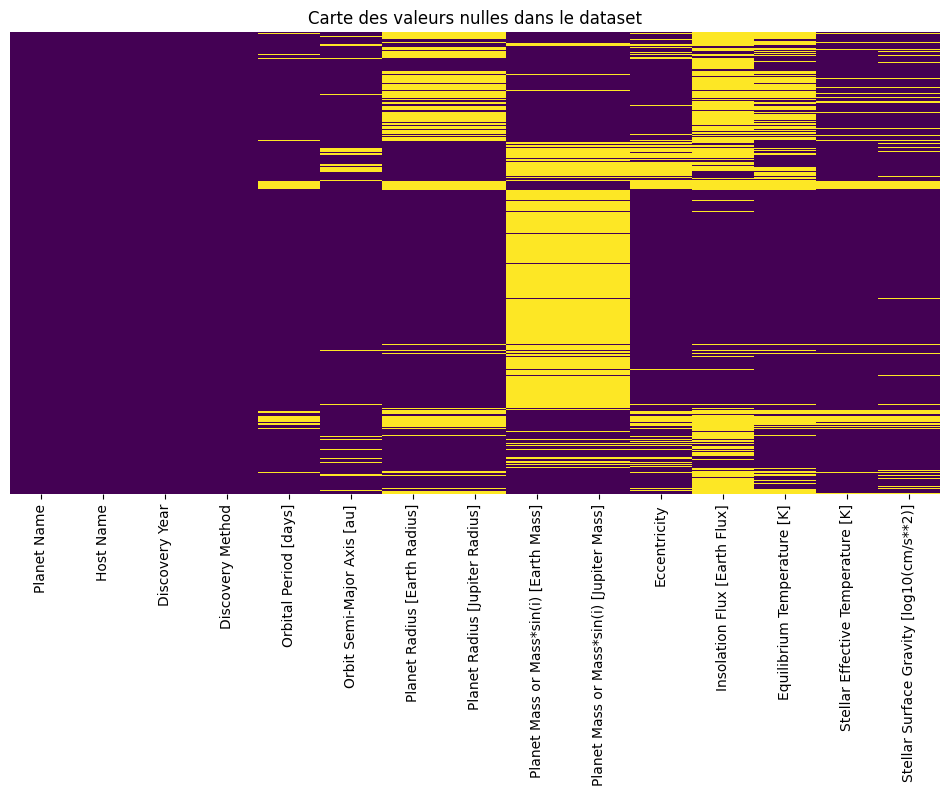

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Carte des valeurs nulles dans le dataset")
plt.show()


7. Y a-t-il des doublons ? Vous explorerez la fonction duplicated() pour r√©pondre √† cette
question.

In [ ]:
# V√©rifier s'il y a des lignes dupliqu√©es
doublons = df.duplicated()

# Nombre total de doublons
nb_doublons = doublons.sum()

print(f"Nombre de lignes doublons dans le dataset : {nb_doublons}")

# Afficher quelques exemples de doublons si besoin
if nb_doublons > 0:
    print("Exemples de doublons :")
    print(df[doublons].head())
else:
    print("Aucun doublon d√©tect√©.")


Nombre de lignes doublons dans le dataset : 0
Aucun doublon d√©tect√©.


8. Tracer la distribution de chaque indicateur (fonction histplot() de seaborn)

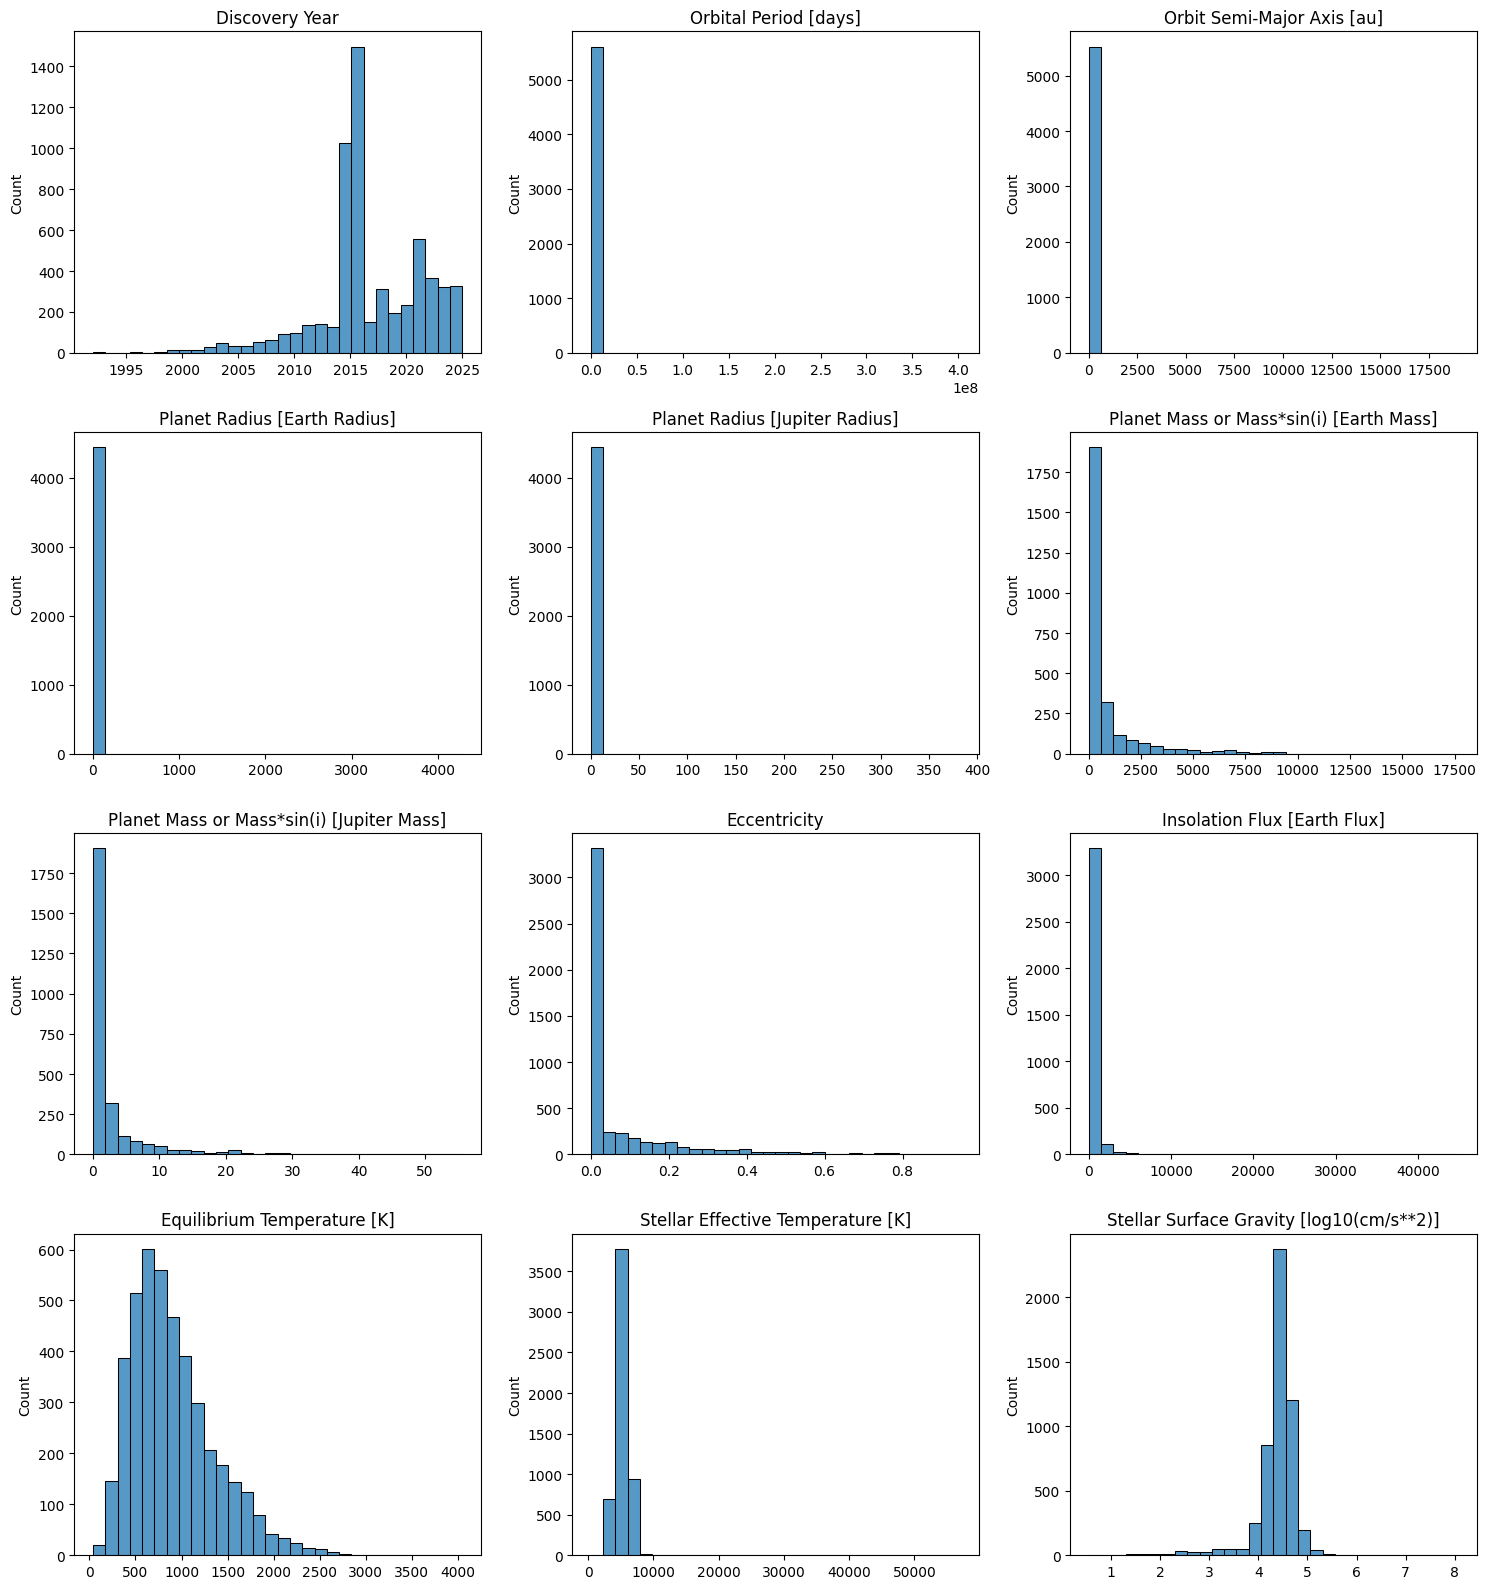

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# S√©lectionner uniquement les colonnes num√©riques pour les histogrammes
colonnes_numeriques = df.select_dtypes(include=['number']).columns

# D√©finir le nombre de colonnes pour l'affichage en grille
n_cols = 3
n_rows = (len(colonnes_numeriques) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col].dropna(), kde=False, bins=30)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


9. Tracer un boxplot pour chaque indicateur (fonction boxplot() de seaborn)

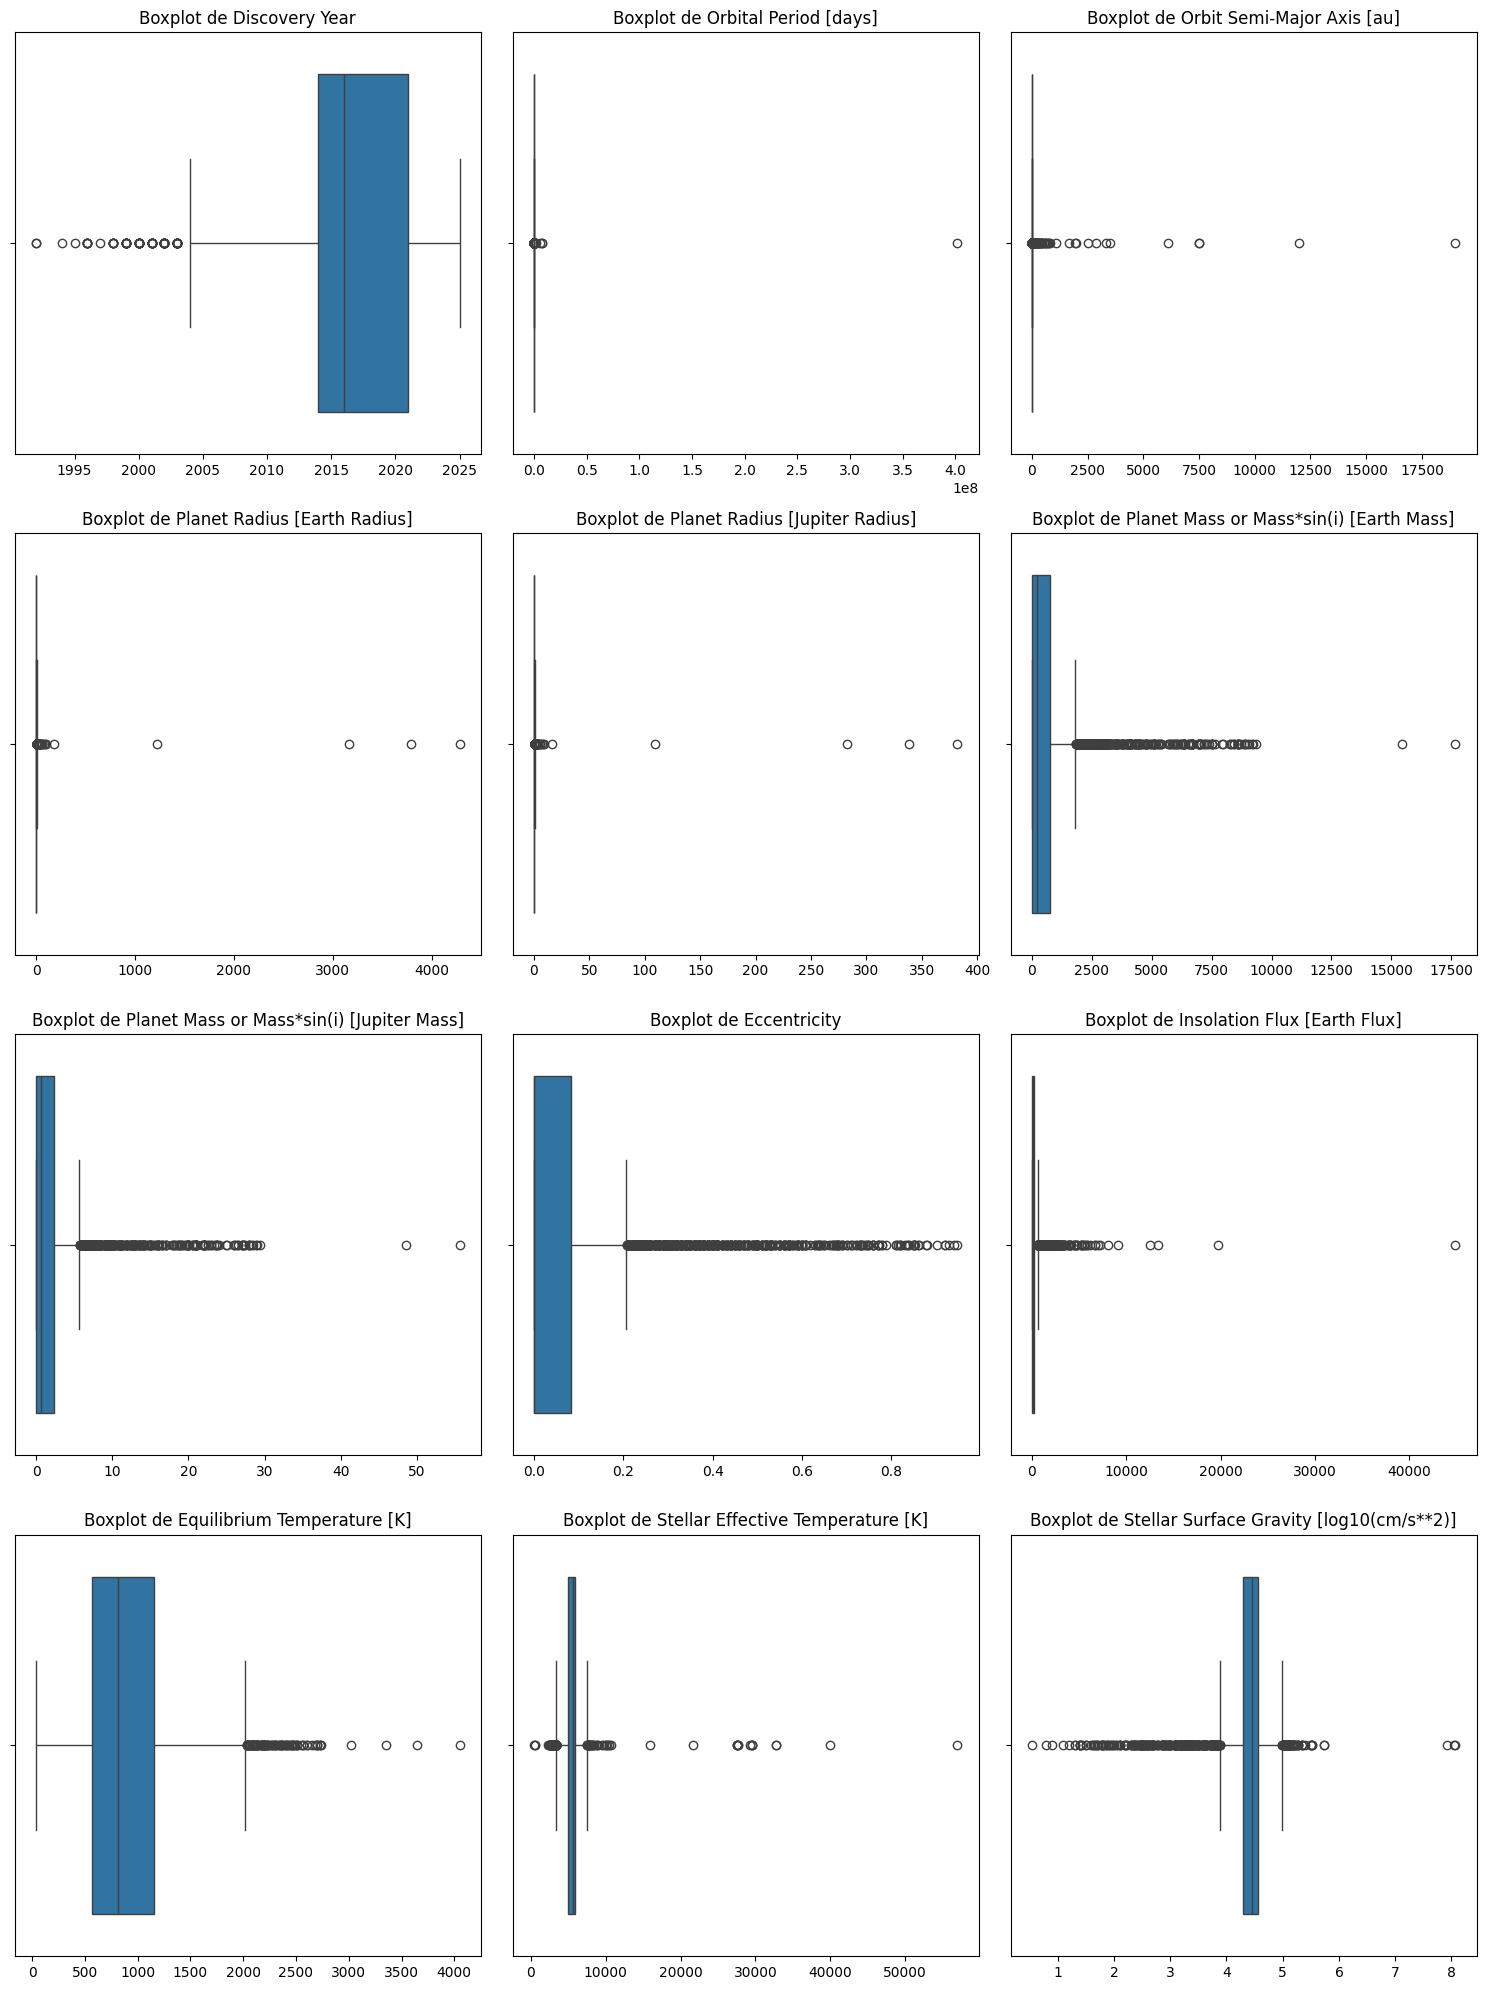

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# S√©lectionner les colonnes num√©riques uniquement
colonnes_numeriques = df.select_dtypes(include=['number']).columns

# D√©finir la taille de la grille d'affichage
n_cols = 3
n_rows = (len(colonnes_numeriques) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 5 * n_rows))

for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel('')  # Pas de label x pour plus de clart√©

plt.tight_layout()
plt.show()


10. Calculer la matrice de corr√©lation et afficher l√† avec la fonction heatmap() de seaborn. Y
a-t-il corr√©lation entre certaines variables ?

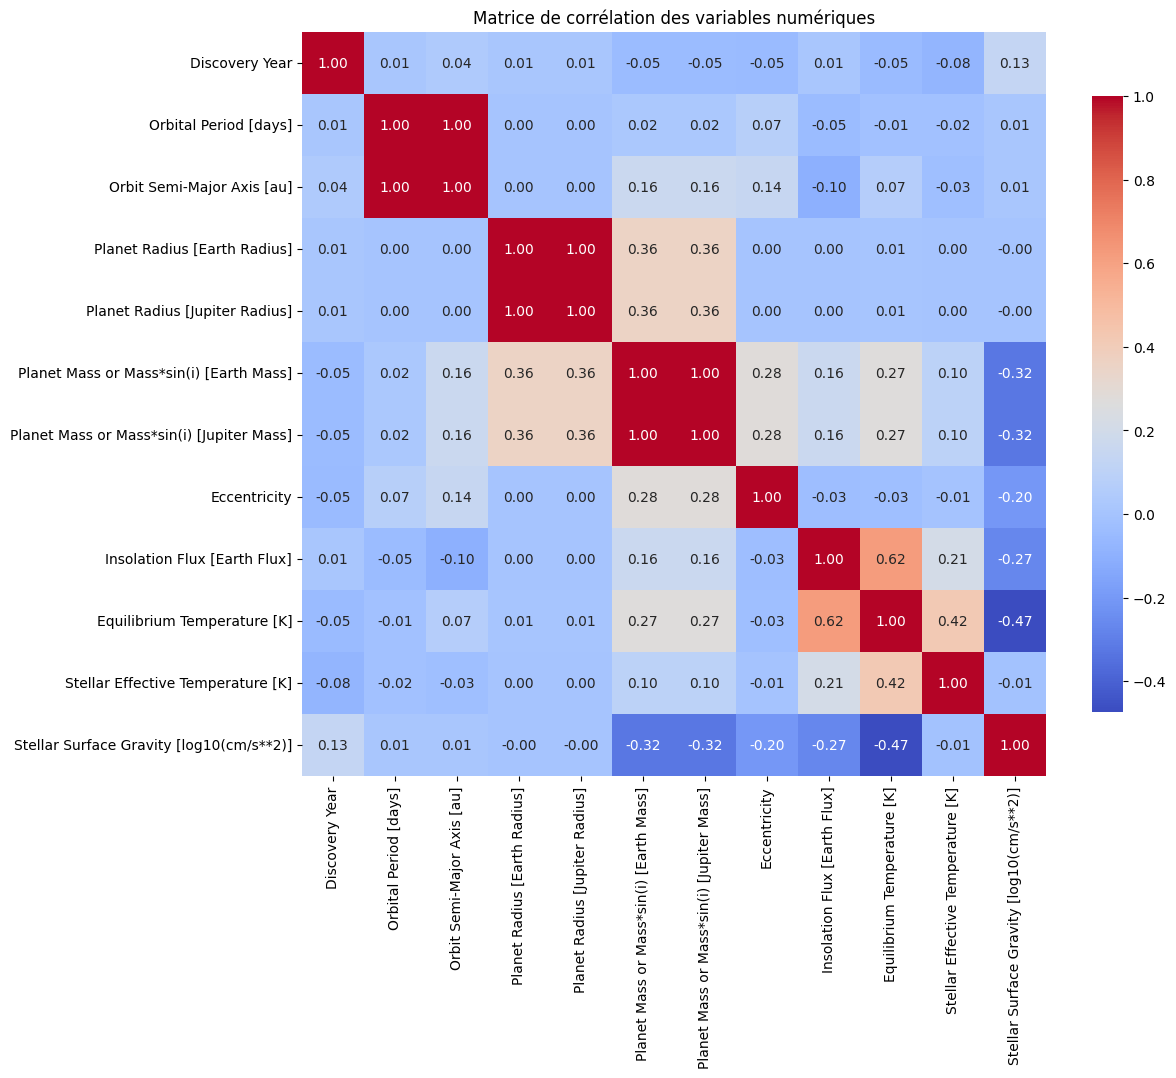

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# S√©lectionner uniquement les colonnes num√©riques
colonnes_numeriques = df.select_dtypes(include=['number']).columns

# Calculer la matrice de corr√©lation (Pearson par d√©faut)
corr_matrix = df[colonnes_numeriques].corr()

# Afficher la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})
plt.title("Matrice de corr√©lation des variables num√©riques")
plt.show()


6'.  Afficher le taux de remplissage de chaque colonne.


In [ ]:
colonnes_a_garder = [
    'Planet Name', 'Host Name', 'Discovery Year', 'Discovery Method',
    'Orbital Period [days]', 'Orbit Semi-Major Axis [au]', 'Planet Radius [Earth Radius]',
    'Planet Radius [Jupiter Radius]', 'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]', 'Eccentricity', 'Insolation Flux [Earth Flux]',
    'Equilibrium Temperature [K]', 'Stellar Effective Temperature [K]', 'Stellar Surface Gravity [log10(cm/s**2)]'
]

df_reduit = df[colonnes_a_garder].copy()

print(df_reduit.head())
#Afficher le taux de remplissage de chaque colonne.
for col, taux in taux_remplissage.items():
    print(f"{col}: {taux:.2f}% rempli")

  Planet Name Host Name  Discovery Year Discovery Method  \
0    11 Com b    11 Com            2007  Radial Velocity   
1    11 UMi b    11 UMi            2009  Radial Velocity   
2    14 And b    14 And            2008  Radial Velocity   
3    14 Her b    14 Her            2002  Radial Velocity   
4  16 Cyg B b  16 Cyg B            1996  Radial Velocity   

   Orbital Period [days]  Orbit Semi-Major Axis [au]  \
0              326.03000                        1.29   
1              516.21997                        1.53   
2              185.84000                        0.83   
3             1773.40002                        2.93   
4              798.50000                        1.66   

   Planet Radius [Earth Radius]  Planet Radius [Jupiter Radius]  \
0                           NaN                             NaN   
1                           NaN                             NaN   
2                           NaN                             NaN   
3                           NaN   

7'. Rep√©rer o√π sont les valeurs nulles et proposer une explication. Est-ce que ces valeurs n‚Äôexistent pas ou est-ce qu‚Äôelle n‚Äôont pas √©t√© remplies ?


In [ ]:
# Nombre de valeurs manquantes par colonne
valeurs_nulles = df_reduit.isnull().sum()
print(valeurs_nulles)
taux_null = df_reduit.isnull().mean() * 100
print(taux_null)


Planet Name                                     0
Host Name                                       0
Discovery Year                                  0
Discovery Method                                0
Orbital Period [days]                         297
Orbit Semi-Major Axis [au]                    364
Planet Radius [Earth Radius]                 1456
Planet Radius [Jupiter Radius]               1456
Planet Mass or Mass*sin(i) [Earth Mass]      3199
Planet Mass or Mass*sin(i) [Jupiter Mass]    3199
Eccentricity                                  955
Insolation Flux [Earth Flux]                 2453
Equilibrium Temperature [K]                  1647
Stellar Effective Temperature [K]             454
Stellar Surface Gravity [log10(cm/s**2)]      690
dtype: int64
Planet Name                                   0.000000
Host Name                                     0.000000
Discovery Year                                0.000000
Discovery Method                              0.000000
Orbital Period [d

| Colonne                                           | % de valeurs manquantes | Niveau          | Explication                                                                                                                     |
|--------------------------------------------------|-------------------------|-----------------|---------------------------------------------------------------------------------------------------------------------------------|
| Planet Name, Host Name, Discovery Year, Discovery Method | 0%                      | Fondamental     | Ces informations sont fondamentales et toujours renseign√©es : nom de la plan√®te, √©toile h√¥te, m√©thode et ann√©e d√©couverte sont essentielles et faciles √† obtenir. |
| Orbital Period [days]                             | ~5%                     | Faible taux     | La p√©riode orbitale n√©cessite des observations r√©p√©t√©es sur plusieurs cycles, donc certaines plan√®tes peuvent ne pas avoir encore assez de donn√©es pour √™tre mesur√©es. |
| Orbit Semi-Major Axis [au]                        | ~6%                     | Faible taux     | Mesure similaire √† la p√©riode orbitale, parfois d√©duite ou estim√©e, mais peut manquer si donn√©es orbitales pr√©cises absentes.   |
| Planet Radius [Earth/Jupiter Radius]              | ~25%                    | Moyenne         | La taille des plan√®tes est souvent plus difficile √† mesurer, surtout pour les exoplan√®tes d√©couvertes par certaines m√©thodes (ex: vitesse radiale, pas de transit visible). |
| Planet Mass or Mass*sin(i) [Earth/Jupiter Mass]  | ~54%                    | Tr√®s √©lev√©      | La masse est particuli√®rement difficile √† mesurer, surtout pour les plan√®tes non d√©tect√©es par transit (qui ne donnent pas le rayon) mais par vitesse radiale, ou si les donn√©es sont incompl√®tes. |
| Eccentricity                                     | ~16%                    | Moyenne         | L‚Äôexcentricit√© orbitale demande une mod√©lisation fine des donn√©es orbitales, parfois non disponible ou non fiable pour certains objets. |
| Insolation Flux [Earth Flux]                      | ~42%                    | √âlev√©           | Ce flux d√©pend √† la fois de la distance √† l‚Äô√©toile et des caract√©ristiques stellaires. Si l‚Äôune de ces donn√©es manque, ce flux ne peut pas √™tre calcul√©. |
| Equilibrium Temperature [K]                       | ~28%                    | √âlev√©           | Calcul√©e √† partir de la luminosit√© de l‚Äô√©toile et de la distance orbitale, donc souvent absente si les donn√©es orbitales ou stellaires manquent. |
| Stellar Effective Temperature [K]                 | ~7.7%                   | Faible          | Donn√©e g√©n√©ralement disponible, mais peut manquer pour √©toiles moins √©tudi√©es ou mal catalogu√©es.                               |
| Stellar Surface Gravity [log10(cm/s¬≤)]            | ~11.7%                  | Faible √† moyenne| Mesure plus fine de l‚Äô√©toile, peut manquer si les donn√©es spectroscopiques ne sont pas pr√©cises ou absentes.                     |



Les donn√©es fondamentales (noms, m√©thode, ann√©e) sont compl√®tes, car elles sont essentielles √† l‚Äôenregistrement et √† la classification des objets.

Les param√®tres orbitales de base sont souvent connus mais parfois manquants pour des exoplan√®tes r√©cemment d√©couvertes ou difficiles √† observer.

Les caract√©ristiques physiques des plan√®tes (rayon, masse) sont souvent absentes parce qu‚Äôelles demandent des m√©thodes sp√©cifiques (ex: transit, vitesse radiale) et des observations longues et pr√©cises.

Les donn√©es stellaires et calcul√©es (flux, temp√©rature d‚Äô√©quilibre) sont manquantes surtout parce qu‚Äôelles d√©pendent des autres mesures orbitale et stellaire.

En r√©sum√©, les valeurs manquantes refl√®tent principalement les limites observationnelles et m√©thodologiques dans la collecte des donn√©es d‚Äôexoplan√®tes.



Combien y a-t-il de plan√®tes diff√©rentes d√©couvertes ?

In [ ]:
nombre_planetes = df['Planet Name'].nunique()
print(f"Nombre de plan√®tes diff√©rentes d√©couvertes : {nombre_planetes}")


Nombre de plan√®tes diff√©rentes d√©couvertes : 5903


In [ ]:
print(df.columns)


Index(['Planet Name', 'Host Name', 'Discovery Year', 'Discovery Method',
       'Orbital Period [days]', 'Orbit Semi-Major Axis [au]',
       'Planet Radius [Earth Radius]', 'Planet Radius [Jupiter Radius]',
       'Planet Mass or Mass*sin(i) [Earth Mass]',
       'Planet Mass or Mass*sin(i) [Jupiter Mass]', 'Eccentricity',
       'Insolation Flux [Earth Flux]', 'Equilibrium Temperature [K]',
       'Stellar Effective Temperature [K]',
       'Stellar Surface Gravity [log10(cm/s**2)]'],
      dtype='object')


11. En quelle ann√©e a-t-on d√©couvert le plus d‚Äôexoplan√®tes ?


In [ ]:
df.head()

Planet Name Host Name  Discovery Year Discovery Method  \
0    11 Com b    11 Com            2007  Radial Velocity   
1    11 UMi b    11 UMi            2009  Radial Velocity   
2    14 And b    14 And            2008  Radial Velocity   
3    14 Her b    14 Her            2002  Radial Velocity   
4  16 Cyg B b  16 Cyg B            1996  Radial Velocity   

   Orbital Period [days]  Orbit Semi-Major Axis [au]  \
0              326.03000                        1.29   
1              516.21997                        1.53   
2              185.84000                        0.83   
3             1773.40002                        2.93   
4              798.50000                        1.66   

   Planet Radius [Earth Radius]  Planet Radius [Jupiter Radius]  \
0                           NaN                             NaN   
1                           NaN                             NaN   
2                           NaN                             NaN   
3                           NaN                             NaN   
4                           NaN                             NaN   

   Planet Mass or Mass*sin(i) [Earth Mass]  \
0                                6165.6000   
1                                4684.8142   
2                                1525.5000   
3                                1481.0878   
4                                 565.7374   

   Planet Mass or Mass*sin(i) [Jupiter Mass]  Eccentricity  \
0                                      19.40         0.231   
1                                      14.74         0.080   
2                                       4.80         0.000   
3                                       4.66         0.370   
4                                       1.78         0.680   

   Insolation Flux [Earth Flux]  Equilibrium Temperature [K]  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

   Stellar Effective Temperature [K]  Stellar Surface Gravity [log10(cm/s**2)]  
0                             4742.0                                      2.31  
1                             4213.0                                      1.93  
2                             4813.0                                      2.63  
3                             5338.0                                      4.45  
4                             5750.0                                      4.36

In [ ]:
# Compter le nombre de plan√®tes d√©couvertes par ann√©e
decouvertes_par_annee = df['Discovery Year'].value_counts()


# Trouver l'ann√©e avec le plus de d√©couvertes
annee_max = decouvertes_par_annee.idxmax()
max_decouvertes = decouvertes_par_annee.max()

print(f"L'ann√©e avec le plus de d√©couvertes est {annee_max} avec {max_decouvertes} exoplan√®tes d√©couvertes.")


L'ann√©e avec le plus de d√©couvertes est 2016 avec 1496 exoplan√®tes d√©couvertes.


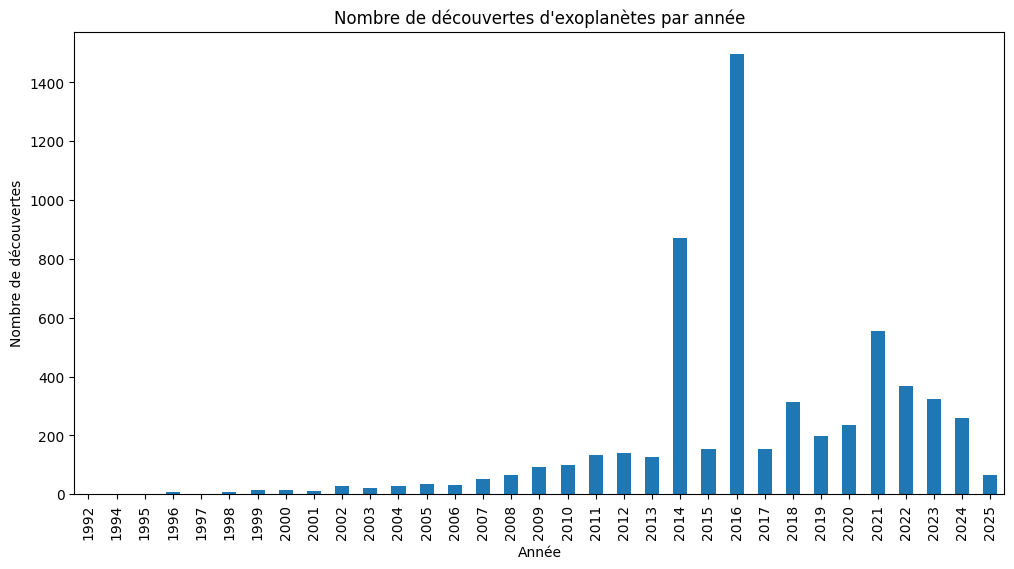

In [ ]:
import matplotlib.pyplot as plt

decouvertes_par_annee.sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Nombre de d√©couvertes d'exoplan√®tes par ann√©e")
plt.xlabel("Ann√©e")
plt.ylabel("Nombre de d√©couvertes")
plt.show()


# Analyse univari√©e et bivari√©e


13. Tracer la distribution de chaque indicateur (fonction histplot() de seaborn)


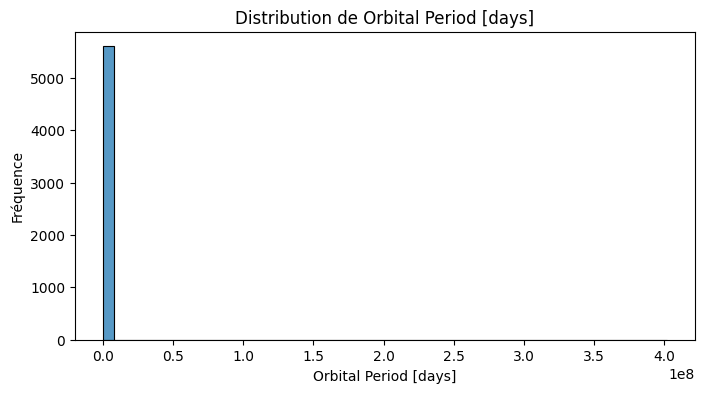

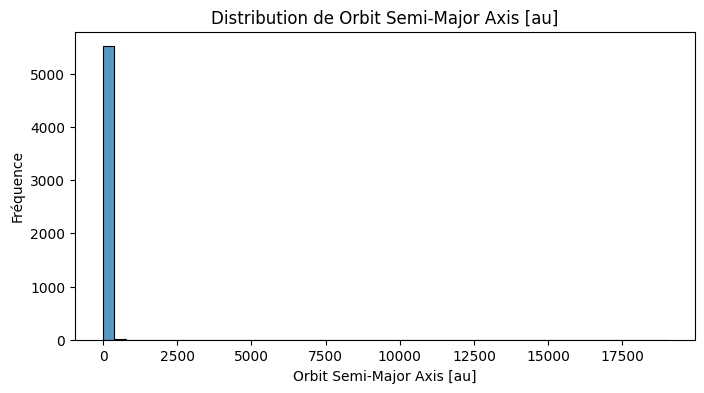

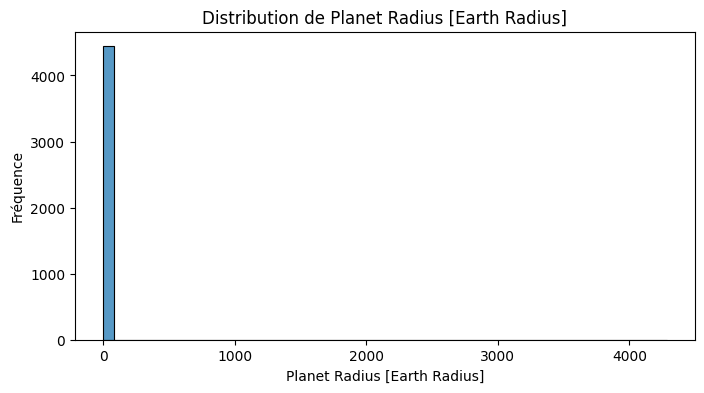

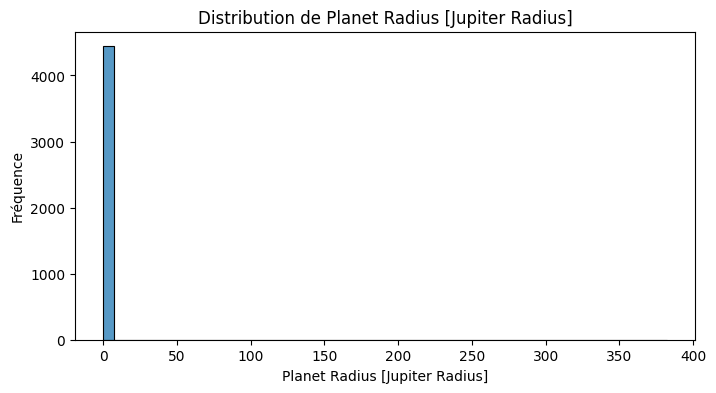

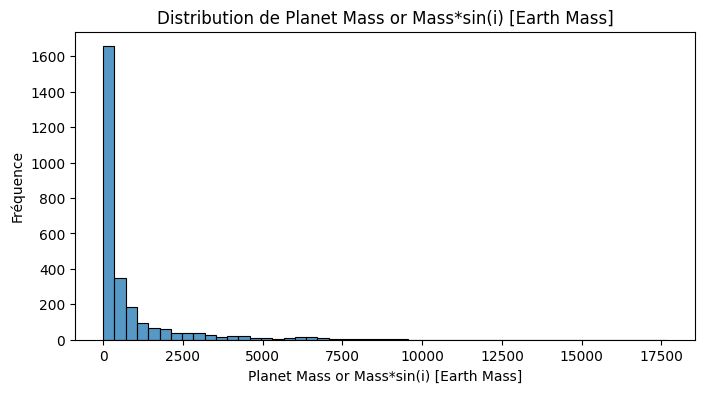

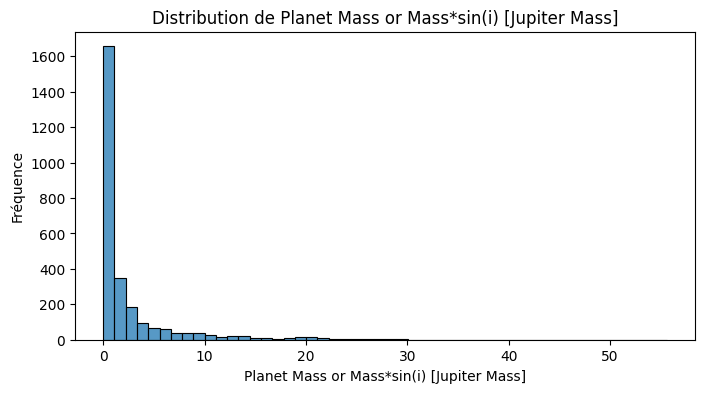

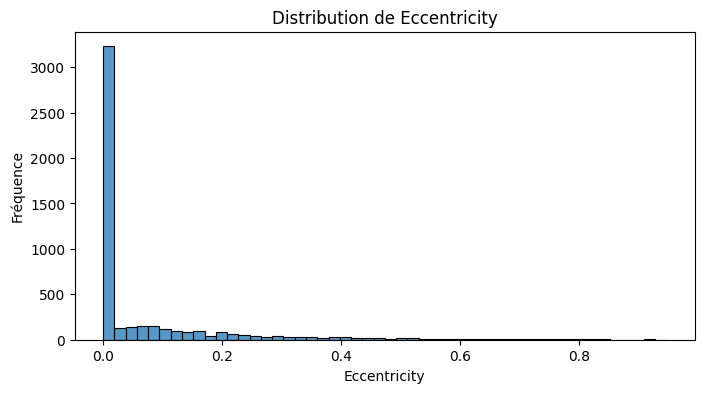

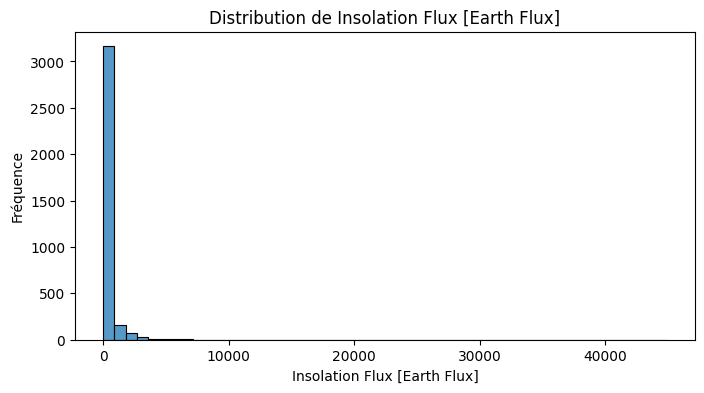

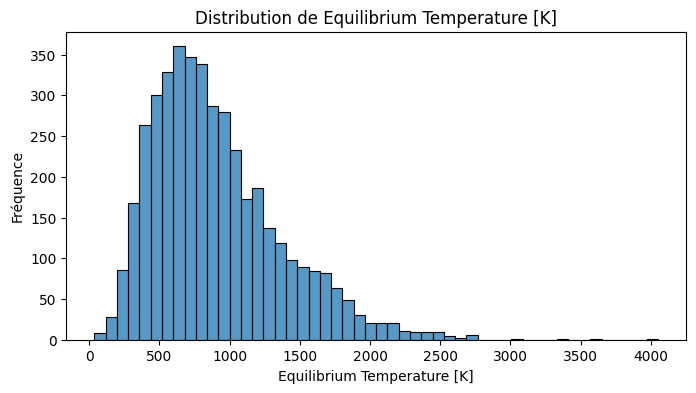

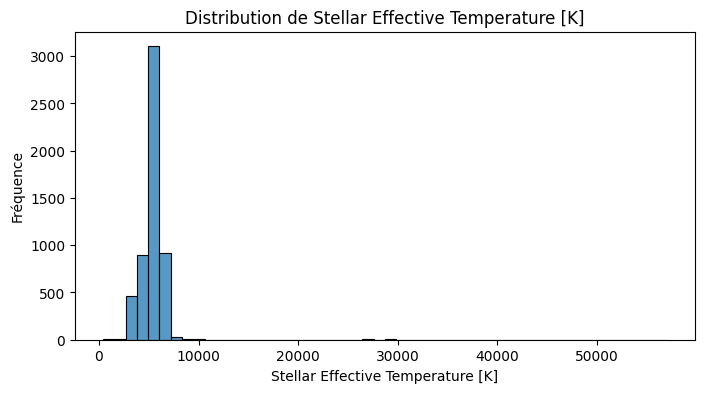

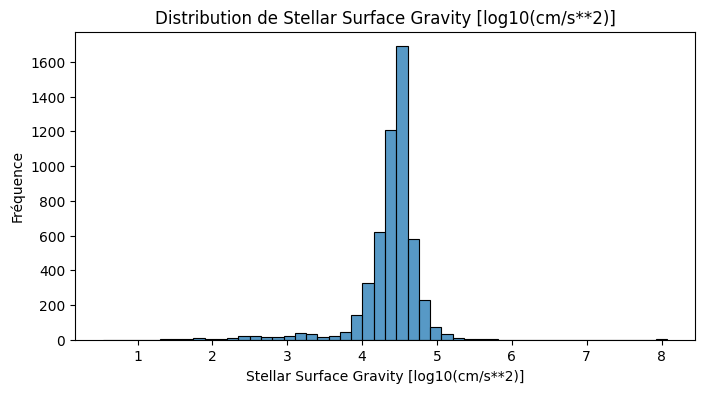

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que ton DataFrame s'appelle df
colonnes_numeriques = [
    'Orbital Period [days]',
    'Orbit Semi-Major Axis [au]',
    'Planet Radius [Earth Radius]',
    'Planet Radius [Jupiter Radius]',
    'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]',
    'Eccentricity',
    'Insolation Flux [Earth Flux]',
    'Equilibrium Temperature [K]',
    'Stellar Effective Temperature [K]',
    'Stellar Surface Gravity [log10(cm/s**2)]'
]

# Tracer un histogramme par colonne
for col in colonnes_numeriques:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), bins=50, kde=False)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fr√©quence")
    plt.show()


14. Tracer un boxplot pour chaque indicateur (fonction boxplot() de seaborn)


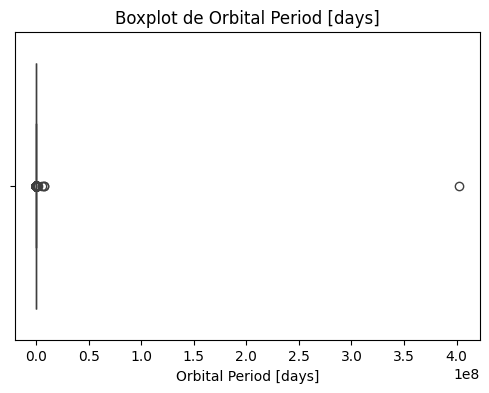

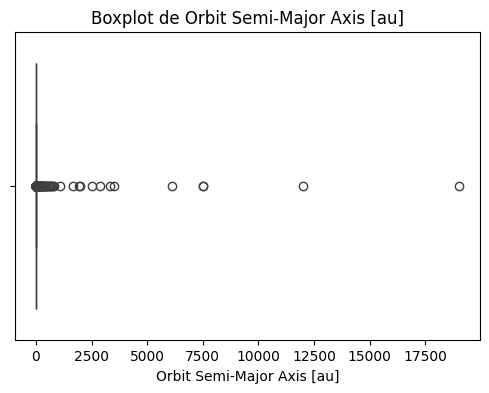

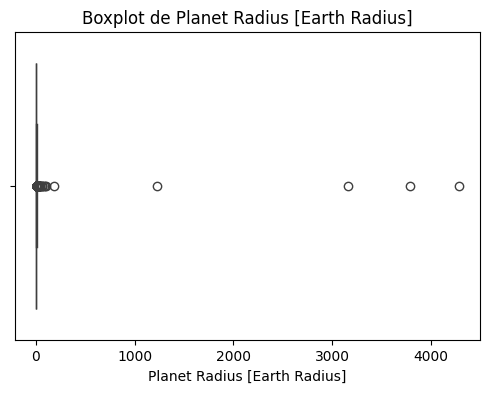

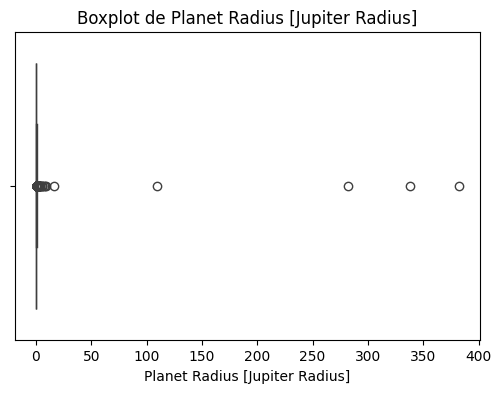

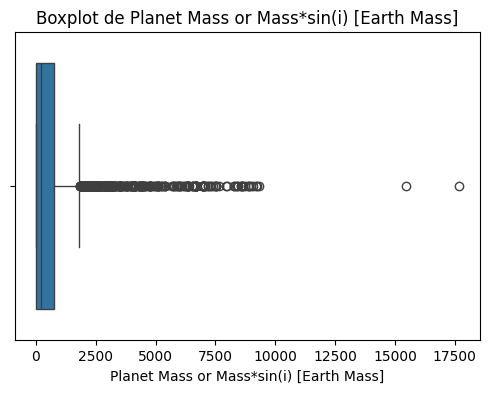

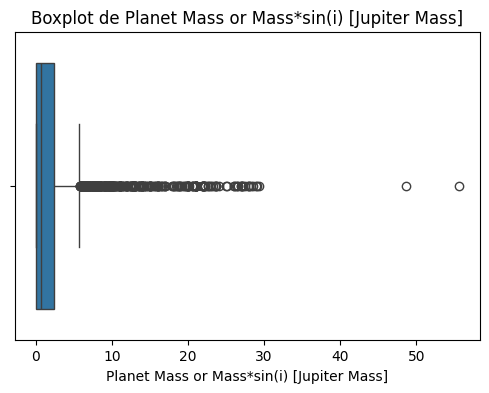

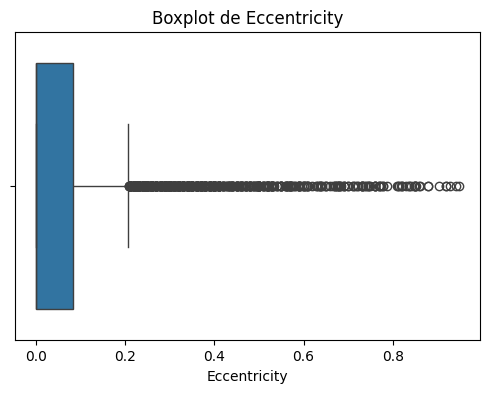

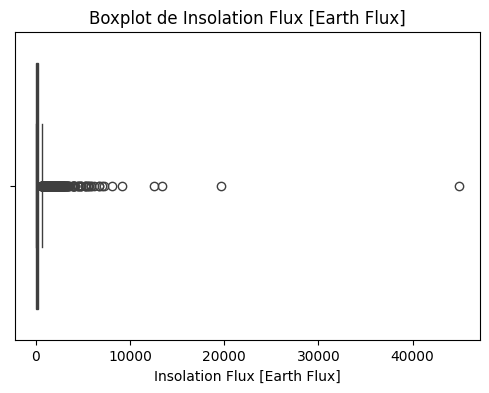

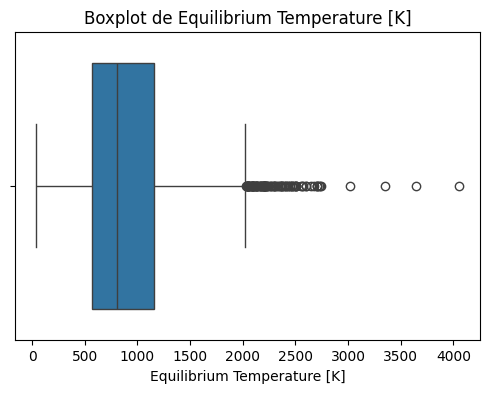

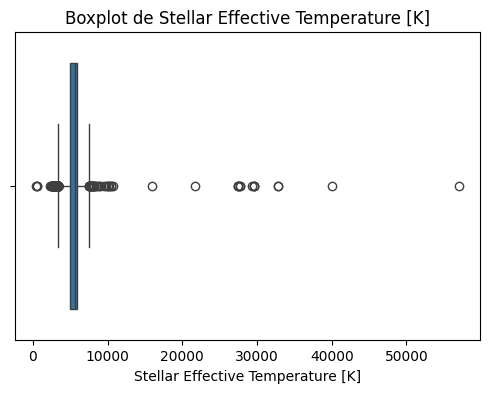

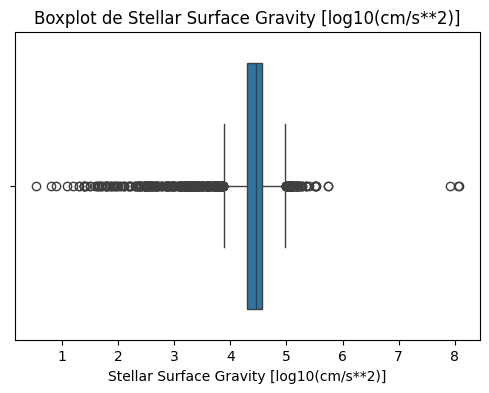

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colonnes_numeriques = [
    'Orbital Period [days]',
    'Orbit Semi-Major Axis [au]',
    'Planet Radius [Earth Radius]',
    'Planet Radius [Jupiter Radius]',
    'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]',
    'Eccentricity',
    'Insolation Flux [Earth Flux]',
    'Equilibrium Temperature [K]',
    'Stellar Effective Temperature [K]',
    'Stellar Surface Gravity [log10(cm/s**2)]'
]

for col in colonnes_numeriques:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()


15. Calculer la matrice de corr√©lation et afficher l√† avec la fonction heatmap() de seaborn. Y a-t-il corr√©lation entre certaines variables ?


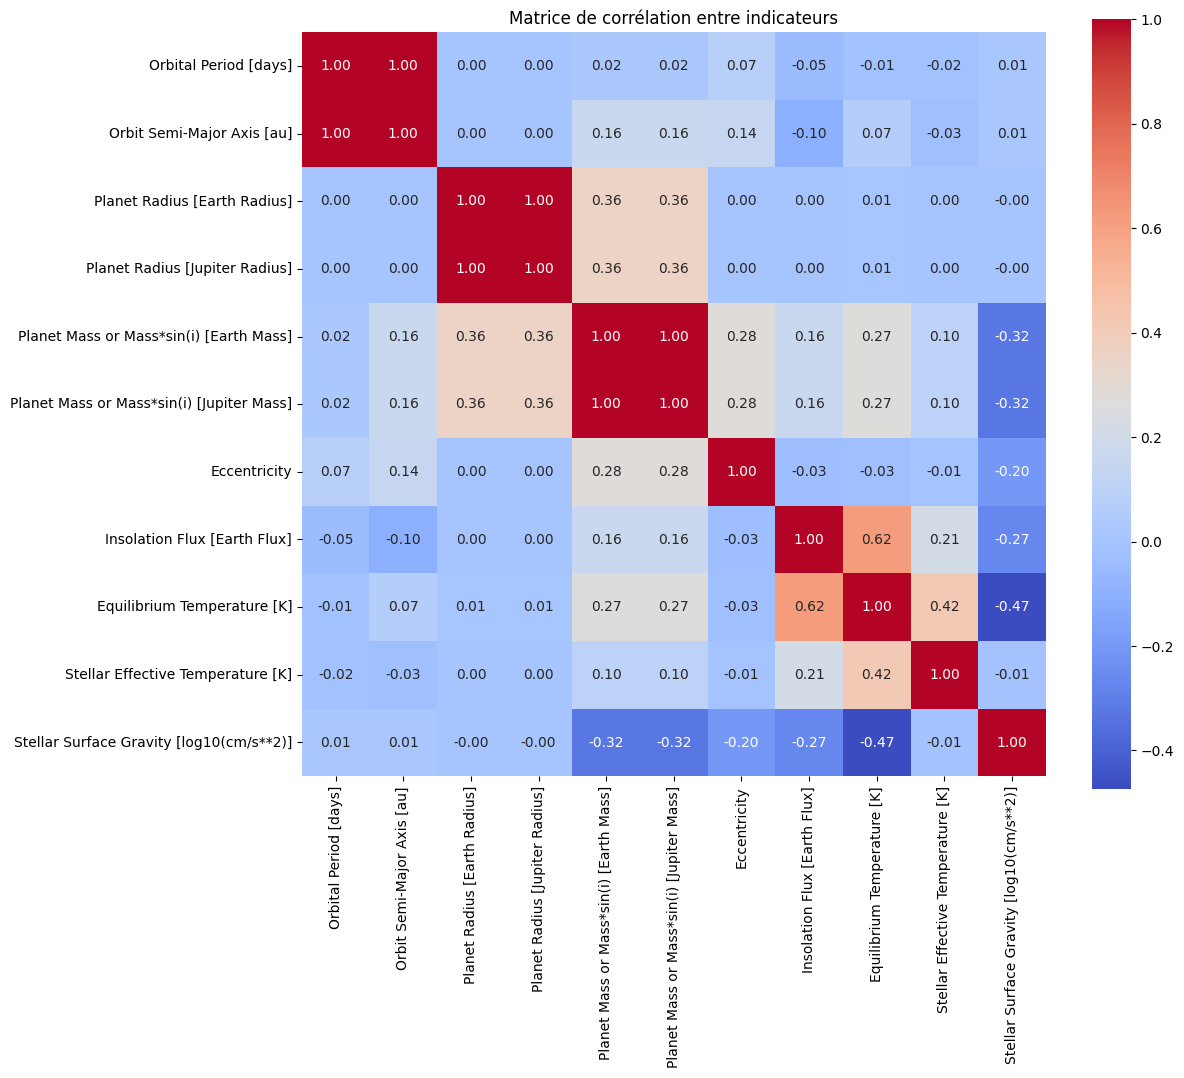

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# S√©lectionner les colonnes num√©riques (les m√™mes que pour les boxplots)
colonnes_numeriques = [
    'Orbital Period [days]',
    'Orbit Semi-Major Axis [au]',
    'Planet Radius [Earth Radius]',
    'Planet Radius [Jupiter Radius]',
    'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]',
    'Eccentricity',
    'Insolation Flux [Earth Flux]',
    'Equilibrium Temperature [K]',
    'Stellar Effective Temperature [K]',
    'Stellar Surface Gravity [log10(cm/s**2)]'
]

# Calculer la matrice de corr√©lation (Pearson par d√©faut)
corr_matrix = df[colonnes_numeriques].corr()

# Afficher la heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corr√©lation entre indicateurs")
plt.show()


11. La troisi√®me loi de Kepler est-elle v√©rifi√©e dans le dataset ?

1. La 3·µâ loi de Kepler dit que pour une plan√®te orbitant autour d‚Äôune √©toile, la p√©riode orbitale au carr√© est proportionnelle au cube du demi-grand axe de l‚Äôorbite.
2. Formuler un probl√®me de classification SVM
L‚Äôid√©e est d‚Äôutiliser un SVM pour classifier si une ligne du dataset respecte ou non la loi, par exemple :

Classe 1 : donn√©es "coh√©rentes" avec la loi (relation proche de
P^2 = a^3

Classe 0 : donn√©es "non coh√©rentes" (√©cart trop grand)

3. Pr√©parer les donn√©es
 1. Calculer
ùëÉ^2 et ùëé^3 √† partir des colonnes pl_orbper et pl_orbsmax.
  2. Calculer une m√©trique d‚Äôerreur
  3. Choisir un seuil pour d√©finir "coh√©rent" ou pas.
  4. Interpr√©tation :
    1. Si le SVM classifie bien, cela signifie qu‚Äôil y a une s√©paration nette entre donn√©es qui respectent ou pas la loi.

    2. Si la classification est mauvaise, soit la loi n‚Äôest pas bien respect√©e dans les donn√©es (par ex. donn√©es bruit√©es), soit il faut affiner la pr√©paration.

In [ ]:
# V√©rifier les noms exacts des colonnes
print(df.columns.tolist())

['Planet Name', 'Host Name', 'Discovery Year', 'Discovery Method', 'Orbital Period [days]', 'Orbit Semi-Major Axis [au]', 'Planet Radius [Earth Radius]', 'Planet Radius [Jupiter Radius]', 'Planet Mass or Mass*sin(i) [Earth Mass]', 'Planet Mass or Mass*sin(i) [Jupiter Mass]', 'Eccentricity', 'Insolation Flux [Earth Flux]', 'Equilibrium Temperature [K]', 'Stellar Effective Temperature [K]', 'Stellar Surface Gravity [log10(cm/s**2)]']


print(y.value_counts())


Cela indique que la majorit√© de tes donn√©es ont une erreur log(P¬≤/a¬≥) tr√®s grande, alors que si la 3·µâ loi de Kepler √©tait respect√©e, on devrait avoir log(P¬≤) ‚âà log(a¬≥), donc erreur proche de 0.

In [ ]:
import numpy as np

# Recalcul √† partir des bonnes colonnes
df_kepler = df[['Orbital Period [days]', 'Orbit Semi-Major Axis [au]']].dropna()

# Calculer P^2 et a^3
P2 = df_kepler['Orbital Period [days]'] ** 2
a3 = df_kepler['Orbit Semi-Major Axis [au]'] ** 3

# Erreur relative en log
erreur = np.abs(np.log(P2) - np.log(a3))


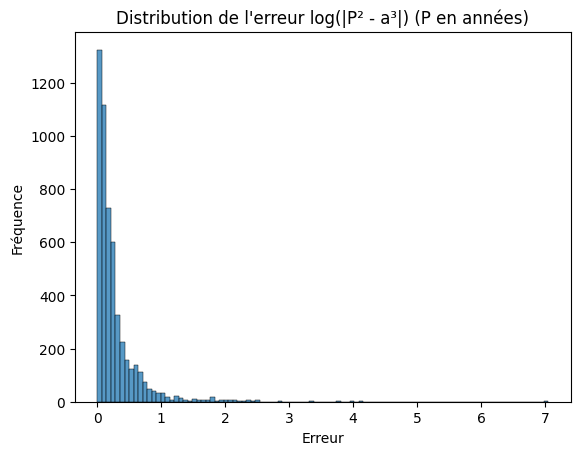

In [ ]:
# Convertir la p√©riode en ann√©es
P_years = df_kepler['Orbital Period [days]'] / 365.25

# Recalculer P^2 et a^3 avec bonnes unit√©s
P2 = P_years ** 2
a3 = df_kepler['Orbit Semi-Major Axis [au]'] ** 3

# Recalculer l'erreur log
erreur = np.abs(np.log(P2) - np.log(a3))

# Visualiser √† nouveau
sns.histplot(erreur, bins=100)
plt.title("Distribution de l'erreur log(|P¬≤ - a¬≥|) (P en ann√©es)")
plt.xlabel("Erreur")
plt.ylabel("Fr√©quence")
plt.show()


La 3·µâ loi de Kepler est globalement v√©rifi√©e dans ton dataset !
L‚Äôerreur √©tant d√©finie par
‚à£
log
‚Å°
(
ùëÉ
2
)
‚àí
log
‚Å°
(
ùëé
3
)
‚à£
‚à£log(P
2
 )‚àílog(a
3
 )‚à£, elle est proche de 0 pour la grande majorit√© des donn√©es.

Cela indique que
ùëÉ
2
‚âà
ùëé
3
P
2
 ‚âàa
3
 , ce qui confirme la loi de Kepler dans les unit√©s correctes (P en ann√©es, a en unit√©s astronomiques).

# Mod√®le de classification SVM

In [ ]:
colonnes_a_garder = [
    'Planet Name', 'Host Name', 'Discovery Year', 'Discovery Method',
    'Orbital Period [days]', 'Orbit Semi-Major Axis [au]', 'Planet Radius [Earth Radius]',
    'Planet Radius [Jupiter Radius]', 'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]', 'Eccentricity', 'Insolation Flux [Earth Flux]',
    'Equilibrium Temperature [K]', 'Stellar Effective Temperature [K]', 'Stellar Surface Gravity [log10(cm/s**2)]'
]

df_reduit = df[colonnes_a_garder].copy()

print(df_reduit.head())



  Planet Name Host Name  Discovery Year Discovery Method  \
0    11 Com b    11 Com            2007  Radial Velocity   
1    11 UMi b    11 UMi            2009  Radial Velocity   
2    14 And b    14 And            2008  Radial Velocity   
3    14 Her b    14 Her            2002  Radial Velocity   
4  16 Cyg B b  16 Cyg B            1996  Radial Velocity   

   Orbital Period [days]  Orbit Semi-Major Axis [au]  \
0              326.03000                        1.29   
1              516.21997                        1.53   
2              185.84000                        0.83   
3             1773.40002                        2.93   
4              798.50000                        1.66   

   Planet Radius [Earth Radius]  Planet Radius [Jupiter Radius]  \
0                           NaN                             NaN   
1                           NaN                             NaN   
2                           NaN                             NaN   
3                           NaN   

In [ ]:
print(df_reduit.isnull().sum())  # Combien de valeurs manquantes par colonne ?
df_clean = df_reduit.dropna(subset=['Orbital Period [days]', 'Orbit Semi-Major Axis [au]']).copy()
# On garde uniquement les lignes avec p√©riode orbitale et demi-grand axe connus


Planet Name                                     0
Host Name                                       0
Discovery Year                                  0
Discovery Method                                0
Orbital Period [days]                         297
Orbit Semi-Major Axis [au]                    364
Planet Radius [Earth Radius]                 1456
Planet Radius [Jupiter Radius]               1456
Planet Mass or Mass*sin(i) [Earth Mass]      3199
Planet Mass or Mass*sin(i) [Jupiter Mass]    3199
Eccentricity                                  955
Insolation Flux [Earth Flux]                 2453
Equilibrium Temperature [K]                  1647
Stellar Effective Temperature [K]             454
Stellar Surface Gravity [log10(cm/s**2)]      690
dtype: int64


In [ ]:
#Calculer P¬≤, a¬≥ et l‚Äôerreur relative en log
import numpy as np

df_kepler['P2'] = df_kepler['Orbital Period [days]'] ** 2
df_kepler['a3'] = df_kepler['Orbit Semi-Major Axis [au]'] ** 3

df_kepler['erreur'] = np.abs(np.log(df_kepler['P2']) - np.log(df_kepler['a3']))



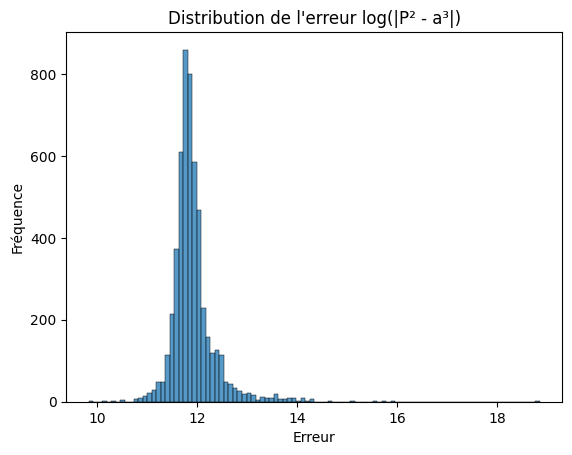

In [ ]:
#Visualiser la distribution des erreurs
#Cette visualisation va m‚Äôaider √† fixer un seuil pertinent.
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_kepler['erreur'], bins=100)
plt.title("Distribution de l'erreur log(|P¬≤ - a¬≥|)")
plt.xlabel("Erreur")
plt.ylabel("Fr√©quence")
plt.show()


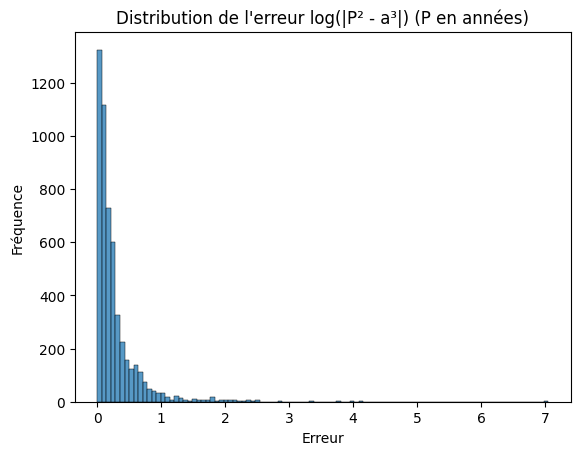

In [ ]:
# Convertir la p√©riode en ann√©es pour avoir la bonne fr√©quence d'erreur
P_years = df_kepler['Orbital Period [days]'] / 365.25

# Recalculer P^2 et a^3 avec bonnes unit√©s
P2 = P_years ** 2
a3 = df_kepler['Orbit Semi-Major Axis [au]'] ** 3

# Recalculer l'erreur log
erreur = np.abs(np.log(P2) - np.log(a3))

# Visualiser √† nouveau
sns.histplot(erreur, bins=100)
plt.title("Distribution de l'erreur log(|P¬≤ - a¬≥|) (P en ann√©es)")
plt.xlabel("Erreur")
plt.ylabel("Fr√©quence")
plt.show()


In [ ]:
#Cr√©er la variable cible ¬´ label ¬ª selon un seuil
seuil = 0.1  # ou un autre seuil que tu choisis selon la distribution

df_kepler['label'] = (df_kepler['erreur'] < seuil).astype(int)


In [ ]:
#quel seuil est raisonnable
erreur = np.abs(np.log(P2) - np.log(a3))
print(erreur.describe())


count    5252.000000
mean        0.268214
std         0.358523
min         0.000009
25%         0.069924
50%         0.159291
75%         0.312942
max         7.054719
dtype: float64


# Ajuster le seuil dynamiquement
Tu peux prendre un seuil bas√© sur la m√©diane ou un quantile. Par exemple : classer les 30 % d‚Äôexoplan√®tes les plus proches de la loi de Kepler comme "coh√©rentes".

In [ ]:
# Supposons que P2 et a3 sont d√©j√† d√©finis
erreur = np.abs(np.log(P2) - np.log(a3))

# D√©finir un seuil comme le 30e percentile
seuil = np.percentile(erreur, 30)
print(f"Seuil dynamique utilis√© : {seuil:.4f}")

# Cr√©er les labels
labels = (erreur < seuil).astype(int)

# V√©rifier la r√©partition des classes
print(labels.value_counts())


Seuil dynamique utilis√© : 0.0836
0    3676
1    1576
Name: count, dtype: int64


3676 exoplan√®tes incoh√©rentes (label 0)

1576 exoplan√®tes coh√©rentes (label 1)

In [ ]:
# Nettoyer les donn√©es : supprimer les lignes avec NaN dans les colonnes utilis√©es
df_kepler = df[['Orbital Period [days]', 'Orbit Semi-Major Axis [au]']].dropna()

# Calculer P2 et a3
P2 = df_kepler['Orbital Period [days]'] ** 2
a3 = df_kepler['Orbit Semi-Major Axis [au]'] ** 3

# Calculer erreur
erreur = np.abs(np.log(P2) - np.log(a3))


Meme avec seulement 50 donn√©es c'est beaucoup trop long en SVM

In [ ]:
#Ne pas lancer
#R√©duction √† 50
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Donn√©es P2 et a3 d√©j√† calcul√©es
# erreur d√©j√† calcul√©e : erreur = np.abs(np.log(P2) - np.log(a3))

# Cr√©er les labels
seuil = np.percentile(erreur, 30)
labels = (erreur < seuil).astype(int)

# Cr√©er X et y
X = pd.DataFrame({'P2': P2, 'a3': a3})
y = labels

# √âquilibrer les classes par √©chantillonnage, max 50 par classe pour acc√©l√©rer
X_0 = X[y == 0]
X_1 = X[y == 1]
n = min(len(X_0), len(X_1), 50)  # max 50

X_sample = pd.concat([
    X_0.sample(n, random_state=42),
    X_1.sample(n, random_state=42)
])
y_sample = y.loc[X_sample.index]

# M√©langer
X_sample = X_sample.sample(frac=1, random_state=42)
y_sample = y_sample.loc[X_sample.index]

# Diviser en jeu d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Entra√Æner le SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Pr√©dictions et √©valuation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Exemple avec K-Means

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Nettoyage
df_kepler = df[['Orbital Period [days]', 'Orbit Semi-Major Axis [au]']].dropna()

# Calculs
P2 = df_kepler['Orbital Period [days]'] ** 2
a3 = df_kepler['Orbit Semi-Major Axis [au]'] ** 3
erreur = np.abs(np.log(P2) - np.log(a3))

# Cr√©ation des labels pour comparaison
seuil = np.percentile(erreur, 30)
labels = (erreur < seuil).astype(int)

# Pr√©paration des donn√©es
X = pd.DataFrame({'P2': P2, 'a3': a3})
y = labels

# √âchantillonnage √©quilibr√© (max 1000 par classe)
X_0 = X[y == 0]
X_1 = X[y == 1]
n = min(len(X_0), len(X_1), 1000)
X_sample = pd.concat([X_0.sample(n, random_state=42), X_1.sample(n, random_state=42)])
y_sample = y.loc[X_sample.index]

# M√©lange
X_sample = X_sample.sample(frac=1, random_state=42)
y_sample = y_sample.loc[X_sample.index]


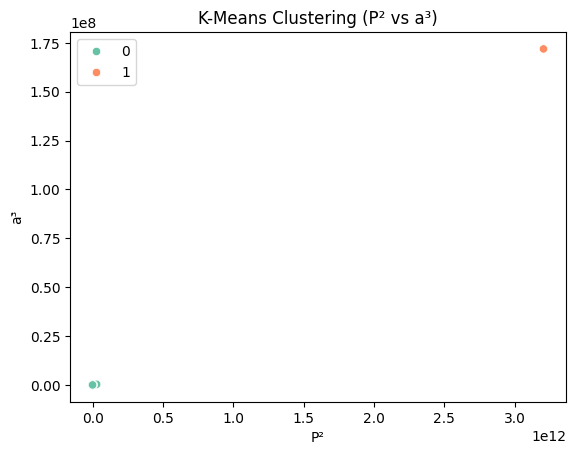

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_sample)

clusters = kmeans.labels_

# Visualisation
sns.scatterplot(data=X_sample, x='P2', y='a3', hue=clusters, palette='Set2')
plt.title("K-Means Clustering (P¬≤ vs a¬≥)")
plt.xlabel("P¬≤")
plt.ylabel("a¬≥")
plt.show()



In [ ]:
# V√©rification du nombre de points par classe
nb_0 = len(X_0)
nb_1 = len(X_1)

print(f"Nombre d'exemples dans la classe 0 : {nb_0}")
print(f"Nombre d'exemples dans la classe 1 : {nb_1}")

# V√©rifie que les deux classes ont au moins 1000 √©chantillons
if nb_0 < 1000 or nb_1 < 1000:
    print(" Pas assez d'exemples dans au moins une des classes pour un √©chantillon de 1000.")
    n = min(nb_0, nb_1)  # Ajustement automatique
    print(f"üí° Utilisation de n = {n} pour √©quilibrer.")
else:
    n = 1000


Nombre d'exemples dans la classe 0 : 3676
Nombre d'exemples dans la classe 1 : 1576


In [ ]:
print(y_sample.value_counts())


1    1000
0    1000
Name: count, dtype: int64


In [ ]:
#Ne pas lancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Donn√©es P2 et a3 d√©j√† calcul√©es
# erreur d√©j√† calcul√©e : erreur = np.abs(np.log(P2) - np.log(a3))

# Cr√©er les labels
seuil = np.percentile(erreur, 30)
labels = (erreur < seuil).astype(int)

# Cr√©er X et y
X = pd.DataFrame({'P2': P2, 'a3': a3})
y = labels

# √âquilibrer les classes par √©chantillonnage
X_0 = X[y == 0]
X_1 = X[y == 1]
n = min(len(X_0), len(X_1))

X_sample = pd.concat([
    X_0.sample(n, random_state=42),
    X_1.sample(n, random_state=42)
])
y_sample = y.loc[X_sample.index]

# M√©langer
X_sample = X_sample.sample(frac=1, random_state=42)
y_sample = y_sample.loc[X_sample.index]

# Diviser en jeu d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Entra√Æner le SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Pr√©dictions et √©valuation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


17.  Tracer le graphique

<ipython-input-39-5c17a94913bb>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


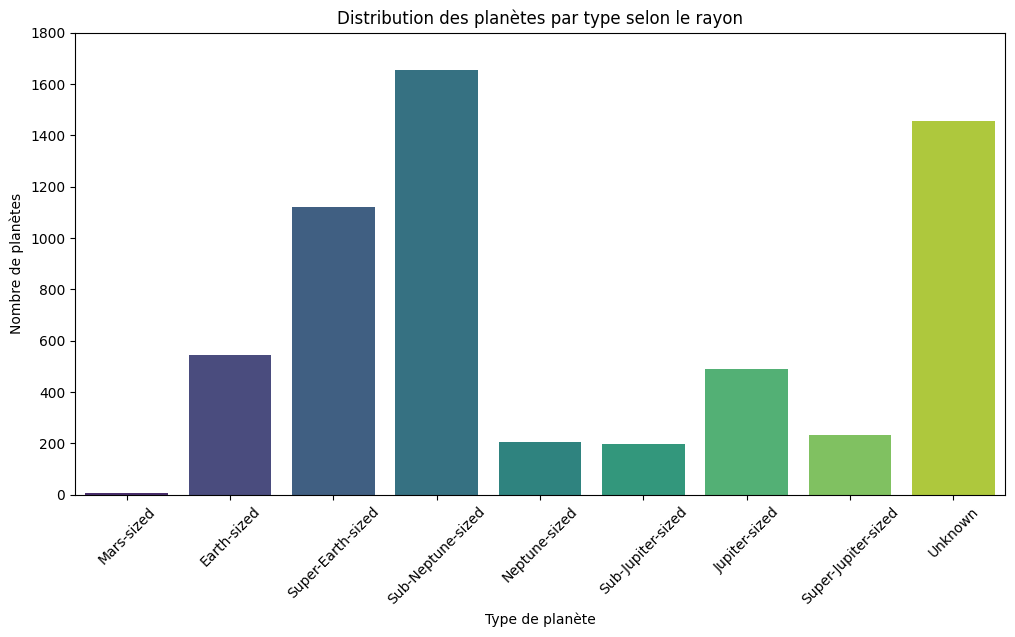

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les donn√©es
df = df[colonnes_a_garder]

# D√©finition des seuils en Earth Radius pour les types de plan√®tes
def get_planet_type(radius):
    if pd.isna(radius):
        return "Unknown"
    if radius < 0.5:
        return "Mars-sized"
    elif radius < 1.25:
        return "Earth-sized"
    elif radius < 2.0:
        return "Super-Earth-sized"
    elif radius < 4.0:
        return "Sub-Neptune-sized"
    elif radius < 6.0:
        return "Neptune-sized"
    elif radius < 10.0:
        return "Sub-Jupiter-sized"
    elif radius < 15.0:
        return "Jupiter-sized"
    else:
        return "Super-Jupiter-sized"

# Cr√©er la colonne planet_type √† partir du rayon en Earth Radius
df['planet_type'] = df['Planet Radius [Earth Radius]'].apply(get_planet_type)

# Compter le nombre de plan√®tes par type
counts = df['planet_type'].value_counts().sort_index()

# Cr√©er un dataframe pour le plot, avec les labels dans l'ordre souhait√©
labels_order = [
    "Mars-sized", "Earth-sized", "Super-Earth-sized", "Sub-Neptune-sized",
    "Neptune-sized", "Sub-Jupiter-sized", "Jupiter-sized", "Super-Jupiter-sized", "Unknown"
]

counts = counts.reindex(labels_order).fillna(0)

# Tracer le barplot
plt.figure(figsize=(12,6))
sns.barplot(x=counts.index, y=counts.values, palette="viridis")

# Ajuster l'axe y pour avoir un pas de 200 (et un max arrondi)
max_y = counts.max()
plt.yticks(range(0, int(max_y + 200), 200))
plt.xlabel("Type de plan√®te")
plt.ylabel("Nombre de plan√®tes")
plt.title("Distribution des plan√®tes par type selon le rayon")
plt.xticks(rotation=45)
plt.show()


18. Partout o√π c‚Äôest possible, calculez la densit√© de la plan√®te avec la formule suivante, exprimant le rapport entre la masse de la plan√®te et son volume :

avec :
Mp : masse de la plan√®te (en g)
Rp : rayon de la plan√®te (en cm)

	Remarques :  
le nombre œÄ s‚Äôobtient, par exemple, avec numpy.pi
Attention, Mp et Rp  doivent d‚Äôabord √™tre converties en kg et en m√®tre pour le calcul de la densit√© !


On part des donn√©es :

Masse en Terres (Earth Mass) ou en Jupiter Mass (√† v√©rifier)

Rayon en Earth Radius (Rayon de la Terre) ou Jupiter Radius

On convertit tout en grammes (g) et centim√®tres (cm) pour avoir la densit√© en g/cm¬≥.

Masse de la Terre
ùëÄ
‚äï
=
5.972
√ó
10
24
M
‚äï
‚Äã
 =5.972√ó10
24
  kg

Rayon de la Terre
ùëÖ
‚äï
=
6.371
√ó
10
6
R
‚äï
‚Äã
 =6.371√ó10
6
  m

1 kg = 1000 g

1 m = 100 cm

Masse en grammes :

ùëÄ
ùëù
(
ùëî
)
=
ùëÄ
ùëù
(
ùê∏
ùëé
ùëü
ùë°
‚Ñé
ùëÄ
ùëé
ùë†
ùë†
)
√ó
5.972
√ó
10
24
√ó
1000
M
p
‚Äã
 (g)=M
p
‚Äã
 (EarthMass)√ó5.972√ó10
24
 √ó1000
Rayon en cm :

ùëÖ
ùëù
(
ùëê
ùëö
)
=
ùëÖ
ùëù
(
ùê∏
ùëé
ùëü
ùë°
‚Ñé
ùëÖ
ùëé
ùëë
ùëñ
ùë¢
ùë†
)
√ó
6.371
√ó
10
6
√ó
100
R
p
‚Äã
 (cm)=R
p
‚Äã
 (EarthRadius)√ó6.371√ó10
6
 √ó100


In [ ]:
import numpy as np

# Constantes
MASS_EARTH_KG = 5.972e24  # kg
RADIUS_EARTH_M = 6.371e6   # m

# Conversion en g et cm
MASS_EARTH_G = MASS_EARTH_KG * 1000   # g
RADIUS_EARTH_CM = RADIUS_EARTH_M * 100 # cm

# Masse en grammes (si disponible en Earth Mass)
df['Mass_g'] = df['Planet Mass or Mass*sin(i) [Earth Mass]'] * MASS_EARTH_G

# Rayon en cm (si disponible en Earth Radius)
df['Radius_cm'] = df['Planet Radius [Earth Radius]'] * RADIUS_EARTH_CM

# Calcul volume en cm¬≥
df['Volume_cm3'] = (4/3) * np.pi * (df['Radius_cm'] ** 3)

# Calcul densit√© (g/cm¬≥)
df['Density_g_cm3'] = df['Mass_g'] / df['Volume_cm3']

# G√©rer les cas o√π masse ou rayon est nul ou absent
df.loc[(df['Mass_g'].isna()) | (df['Radius_cm'].isna()) | (df['Radius_cm'] == 0), 'Density_g_cm3'] = np.nan

# Afficher un aper√ßu des densit√©s calcul√©es
print(df[['Planet Name', 'Density_g_cm3']].head(10))


               Planet Name  Density_g_cm3
0                 11 Com b            NaN
1                 11 UMi b            NaN
2                 14 And b            NaN
3                 14 Her b            NaN
4               16 Cyg B b            NaN
5                 17 Sco b            NaN
6                 18 Del b            NaN
7  1RXS J160929.1-210524 b       2.162359
8                 24 Boo b            NaN
9                 24 Sex b            NaN


18. Remplissez une nouvelle colonne ‚Äúcomposition‚Äù avec les labels ‚Äúrocky‚Äù (rocheux) ou ‚Äúgaseous‚Äù (gazeux) suivant la densit√© de la plan√®te. Pour information, voici les donn√©es des plan√®tes du Syst√®me Solaire et leurs labels :

Pour remplir une colonne "composition" qui cat√©gorise les plan√®tes en rocky ou gaseous en fonction de leur densit√©, on peut utiliser une r√®gle simple bas√©e sur les densit√©s des plan√®tes du Syst√®me Solaire que tu as fournies.

Observations :
Les plan√®tes rocheuses ont une densit√© ‚â• 3.93 g/cm¬≥ (Mars √©tant la plus faible rocheuse).

Les plan√®tes gazeuses ont une densit√© ‚â§ 1.64 g/cm¬≥ (Neptune √©tant la plus dense gazeuse).

Seuil √† retenir
Pour classifier, un seuil simple est √† mi-chemin entre 1.64 et 3.93, disons environ 3 g/cm¬≥ :

Si densit√© ‚â• 3 ‚Üí rocky

Sinon ‚Üí gaseous



In [ ]:
import numpy as np

# Conversion des unit√©s Terre vers grammes et cm
M_earth_g = 5.972e27  # masse Terre en grammes
R_earth_cm = 6.371e8  # rayon Terre en cm

# Supposons que tes colonnes s'appellent 'Planet Mass or Mass*sin(i) [Earth Mass]' et 'Planet Radius [Earth Radius]'
mass_earth = df['Planet Mass or Mass*sin(i) [Earth Mass]']  # en masses Terre
radius_earth = df['Planet Radius [Earth Radius]']          # en rayons Terre

# Calcul masse en grammes
mass_g = mass_earth * M_earth_g

# Calcul rayon en cm
radius_cm = radius_earth * R_earth_cm

# Calcul du volume en cm^3 : (4/3) * pi * R^3
volume_cm3 = (4/3) * np.pi * radius_cm ** 3

# Calcul densit√© en g/cm^3
df['density'] = mass_g / volume_cm3

def composition_label(density):
    if density >= 3:
        return 'rocky'
    else:
        return 'gaseous'

df['composition'] = df['density'].apply(composition_label)


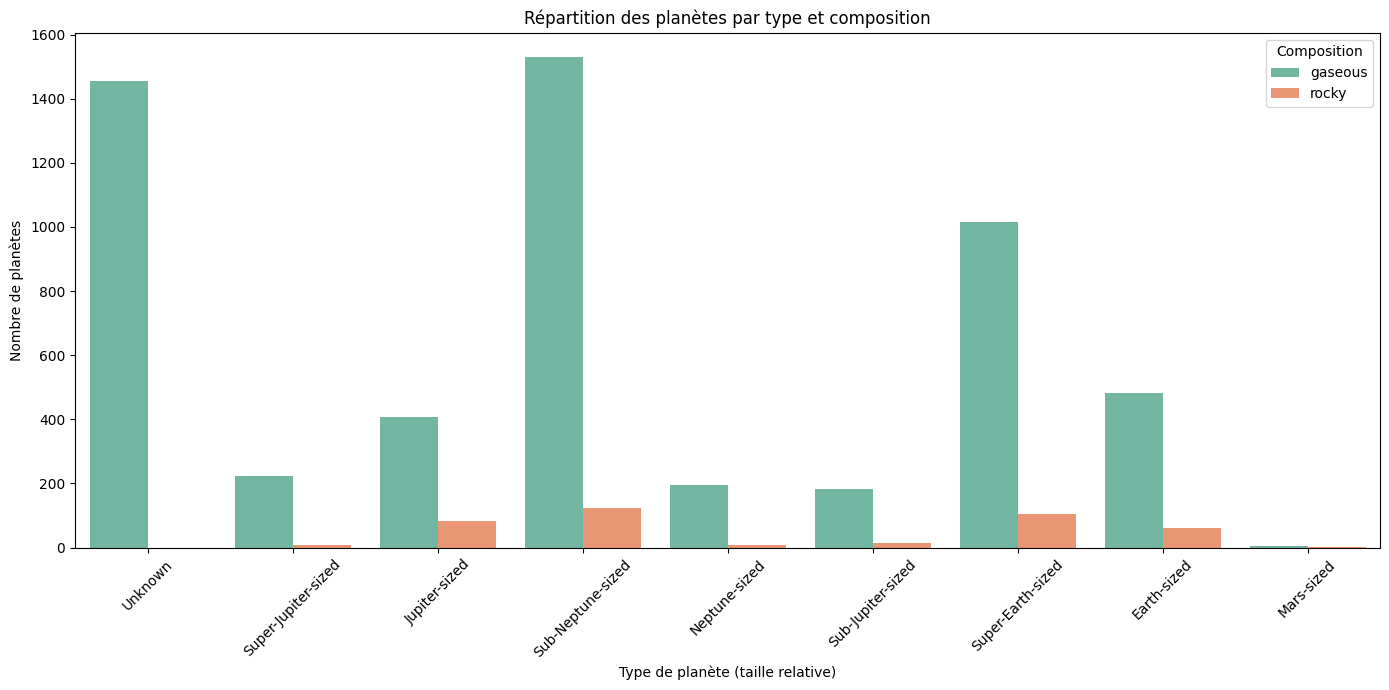

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que tu as d√©j√† la colonne 'planet_type' dans df (ex: Mars-sized, Earth-sized, etc.)
# Sinon, on peut la cr√©er aussi (je peux te rappeler comment faire si besoin)

# Visualisation : nombre de plan√®tes par composition et par type
plt.figure(figsize=(14, 7))

sns.countplot(data=df, x='planet_type', hue='composition', palette='Set2')

plt.title('R√©partition des plan√®tes par type et composition')
plt.xlabel('Type de plan√®te (taille relative)')
plt.ylabel('Nombre de plan√®tes')
plt.xticks(rotation=45)
plt.legend(title='Composition')
plt.tight_layout()
plt.show()


20. Quel crit√®re utiliser pour remplir les labels sur la composition √† partir des plan√®tes du syst√®me solaire ? Vous pourrez utiliser un crit√®re de seuil et un algorithme de classification supervis√©e, entra√Æn√© sur les donn√©es du syst√®me solaire, puis comparer les r√©sultats.


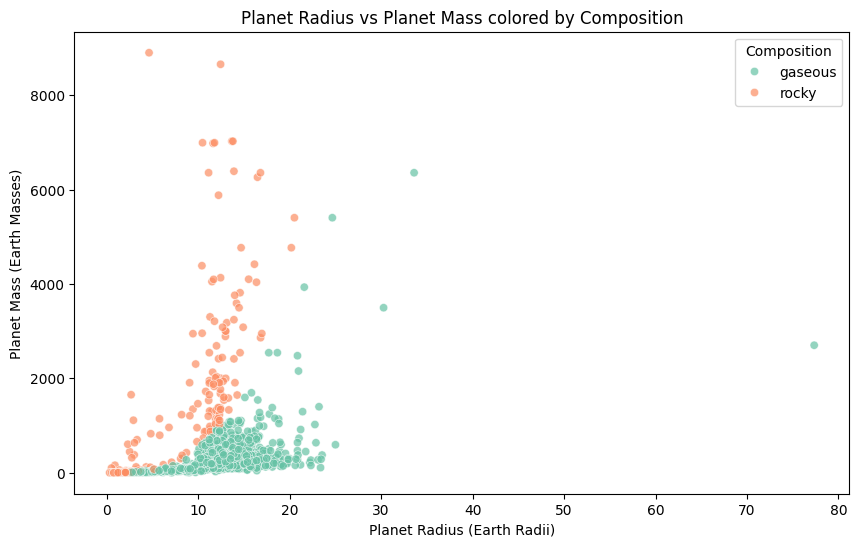

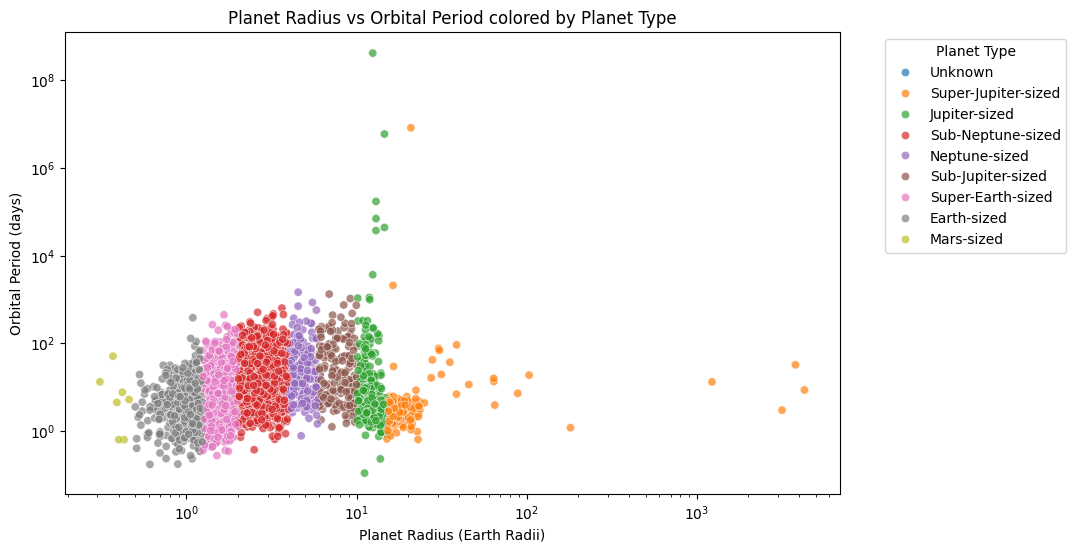

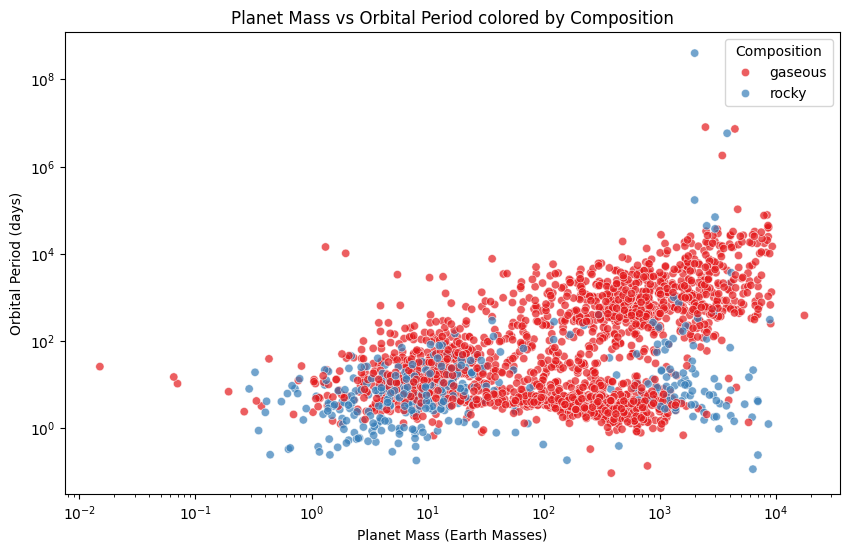

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple 1 : Rayon vs Masse, color√© par composition
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Planet Radius [Earth Radius]',
    y='Planet Mass or Mass*sin(i) [Earth Mass]',
    hue='composition',
    palette='Set2',
    alpha=0.7
)
plt.title('Planet Radius vs Planet Mass colored by Composition')
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Planet Mass (Earth Masses)')
plt.legend(title='Composition')
plt.show()

# Exemple 2 : Rayon vs P√©riode orbitale, color√© par planet_type
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Planet Radius [Earth Radius]',
    y='Orbital Period [days]',
    hue='planet_type',
    palette='tab10',
    alpha=0.7
)
plt.title('Planet Radius vs Orbital Period colored by Planet Type')
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Orbital Period (days)')
plt.xscale('log')  # Ajout√© pour √©chelle log en X pour mieux voir
plt.legend(title='Planet Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')  # √©chelle log utile pour la p√©riode orbitale
plt.show()

# Exemple 3 : Masse vs P√©riode orbitale, color√© par composition
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Planet Mass or Mass*sin(i) [Earth Mass]',
    y='Orbital Period [days]',
    hue='composition',
    palette='Set1',
    alpha=0.7
)
plt.title('Planet Mass vs Orbital Period colored by Composition')
plt.xlabel('Planet Mass (Earth Masses)')
plt.ylabel('Orbital Period (days)')
plt.legend(title='Composition')
plt.yscale('log')
plt.xscale('log')  # masse souvent tr√®s variable => √©chelle log
plt.show()



In [ ]:
print(df.columns.tolist())


['Planet Name', 'Host Name', 'Discovery Year', 'Discovery Method', 'Orbital Period [days]', 'Orbit Semi-Major Axis [au]', 'Planet Radius [Earth Radius]', 'Planet Radius [Jupiter Radius]', 'Planet Mass or Mass*sin(i) [Earth Mass]', 'Planet Mass or Mass*sin(i) [Jupiter Mass]', 'Eccentricity', 'Insolation Flux [Earth Flux]', 'Equilibrium Temperature [K]', 'Stellar Effective Temperature [K]', 'Stellar Surface Gravity [log10(cm/s**2)]', 'planet_type', 'Mass_g', 'Radius_cm', 'Volume_cm3', 'Density_g_cm3', 'density', 'composition']


In [ ]:
df_clean = df.dropna(subset=[
    'Planet Radius [Earth Radius]',
    'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Orbital Period [days]',
    'planet_type',
    'composition'
])


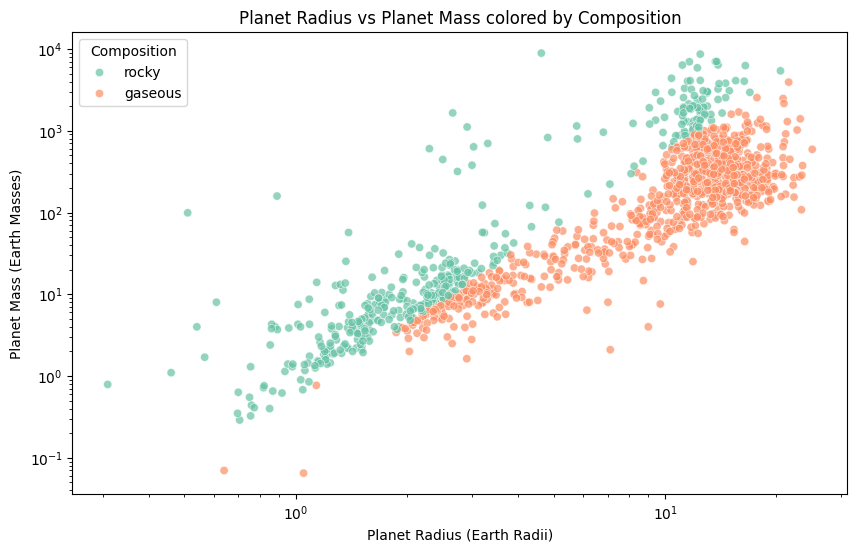

In [ ]:
# Rayon vs Masse
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean,
    x='Planet Radius [Earth Radius]',
    y='Planet Mass or Mass*sin(i) [Earth Mass]',
    hue='composition',
    palette='Set2',
    alpha=0.7
)
plt.title('Planet Radius vs Planet Mass colored by Composition')
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Planet Mass (Earth Masses)')
plt.xscale('log')  # rayon tr√®s variable => log souvent utile
plt.yscale('log')  # masse tr√®s variable => log utile
plt.legend(title='Composition')
plt.show()


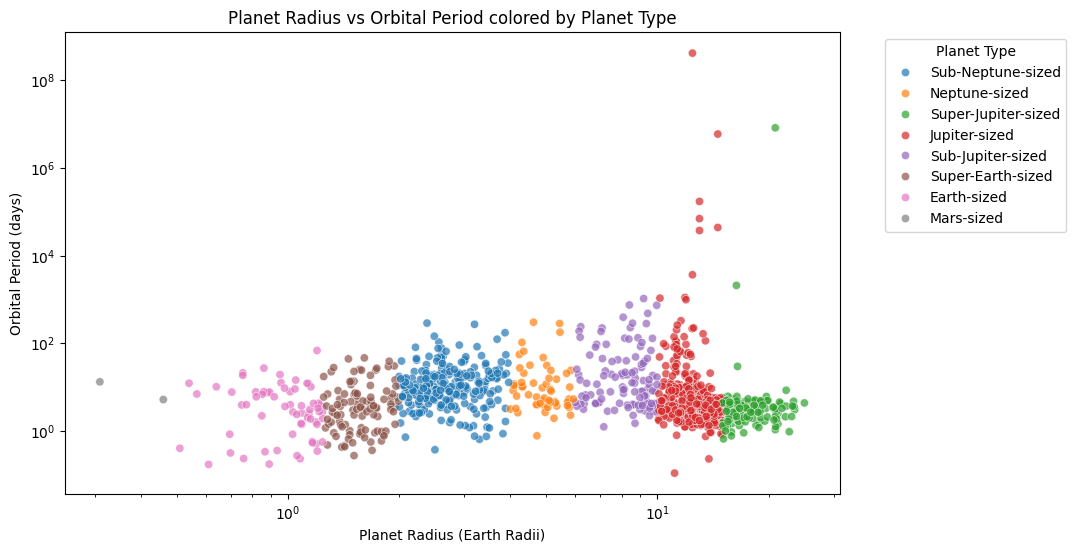

In [ ]:
# Rayon vs P√©riode orbitale
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean,
    x='Planet Radius [Earth Radius]',
    y='Orbital Period [days]',
    hue='planet_type',
    palette='tab10',
    alpha=0.7
)
plt.title('Planet Radius vs Orbital Period colored by Planet Type')
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Orbital Period (days)')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Planet Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


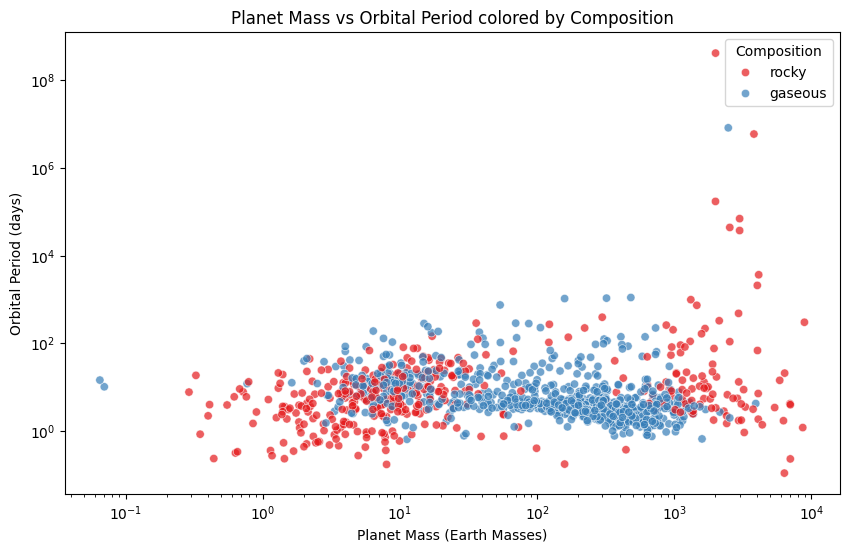

In [ ]:
# Masse vs P√©riode orbitale
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean,
    x='Planet Mass or Mass*sin(i) [Earth Mass]',
    y='Orbital Period [days]',
    hue='composition',
    palette='Set1',
    alpha=0.7
)
plt.title('Planet Mass vs Orbital Period colored by Composition')
plt.xlabel('Planet Mass (Earth Masses)')
plt.ylabel('Orbital Period (days)')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Composition')
plt.show()


#Pourquoi utiliser une √©chelle logarithmique ?
Le rayon, la masse, et la p√©riode orbitale peuvent varier sur plusieurs ordres de grandeur.

L‚Äô√©chelle logarithmique permet de visualiser correctement la r√©partition et les regroupements de plan√®tes, sans que les petites valeurs soient √©cras√©es.

In [ ]:
!pip install plotly


**Plotly** est une biblioth√®que Python pour cr√©er des graphes interactifs et tr√®s visuels, comme :

Graphiques en ligne, barres, scatter plots, etc.

Graphiques 3D,

Cartes g√©ographiques,

Dashboards interactifs.



In [ ]:
import plotly.express as px

# Nettoyer les donn√©es
df_clean = df.dropna(subset=[
    'Planet Radius [Earth Radius]',
    'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Orbital Period [days]',
    'composition',       # Assure-toi que la colonne existe
    'planet_type'        # Assure-toi que la colonne existe
])

fig = px.scatter_3d(
    df_clean,
    x='Planet Radius [Earth Radius]',
    y='Planet Mass or Mass*sin(i) [Earth Mass]',
    z='Orbital Period [days]',
    color='composition',   # tu peux mettre aussi 'planet_type'
    symbol='planet_type',  # optionnel, pour varier le marker selon le type
    size='Planet Radius [Earth Radius]',  # optionnel, taille selon le rayon
    hover_name='Planet Name',  # nom de la plan√®te au survol
    log_x=True,
    log_y=True,
    log_z=True,
    title='Exoplanets 3D: Radius vs Mass vs Orbital Period (log scale)'
)

fig.update_layout(
    scene=dict(
        xaxis_title='Planet Radius (Earth Radii)',
        yaxis_title='Planet Mass (Earth Masses)',
        zaxis_title='Orbital Period (days)'
    ),
    legend_title_text='Composition'
)

fig.show()


# Explication
log_x=True, log_y=True, log_z=True : √©chelle logarithmique sur les 3 axes.

color : variable cat√©gorielle pour la couleur.

symbol : change la forme des points selon un autre facteur cat√©goriel (optionnel).

size : la taille du point selon le rayon pour plus de lisibilit√©.

hover_name : affiche le nom de la plan√®te au survol.



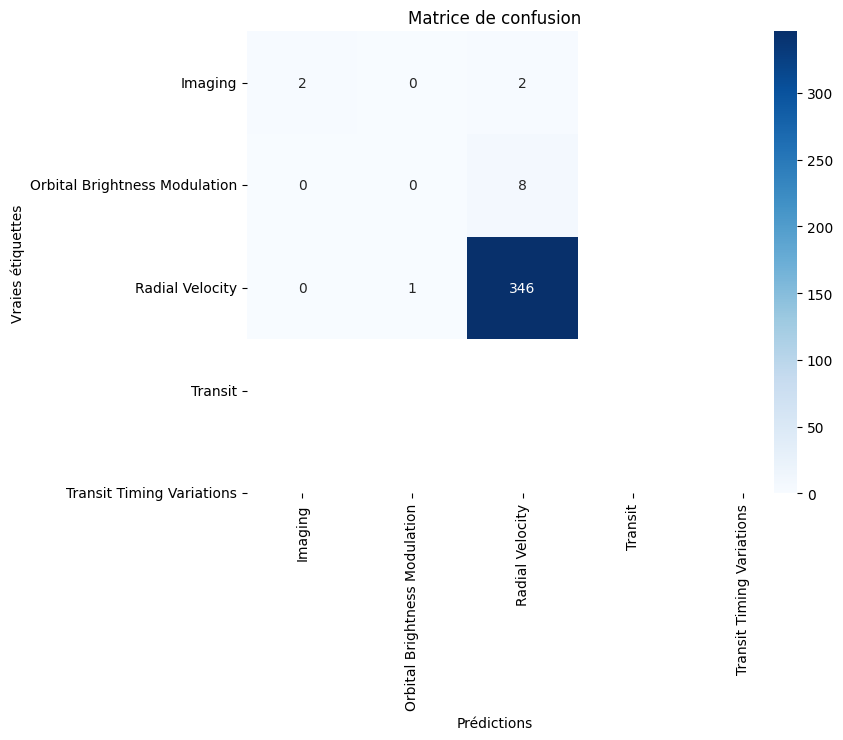

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Pr√©dictions')
plt.ylabel('Vraies √©tiquettes')
plt.title('Matrice de confusion')
plt.show()


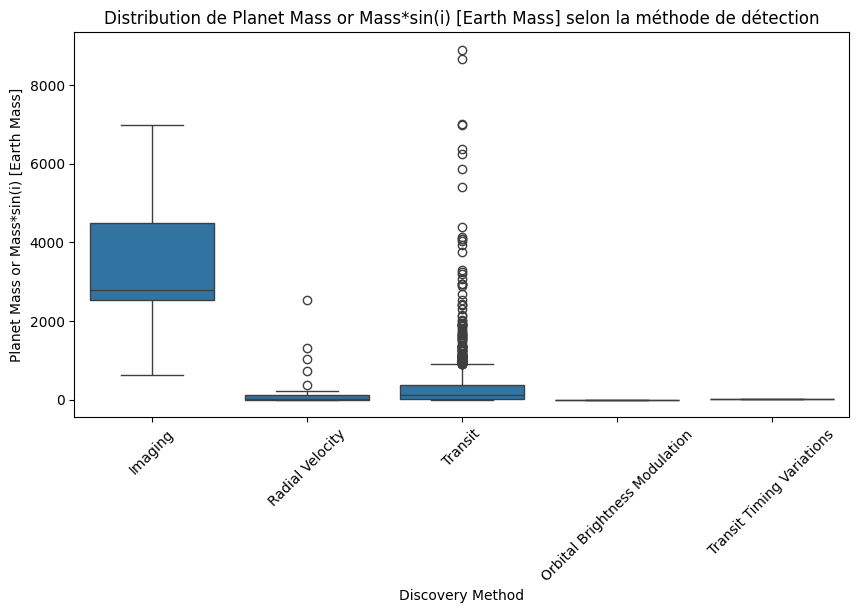

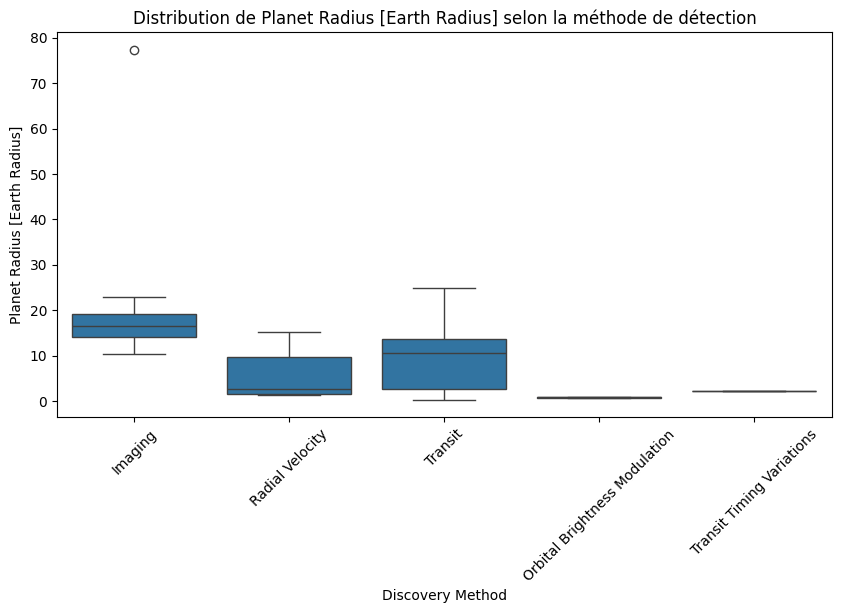

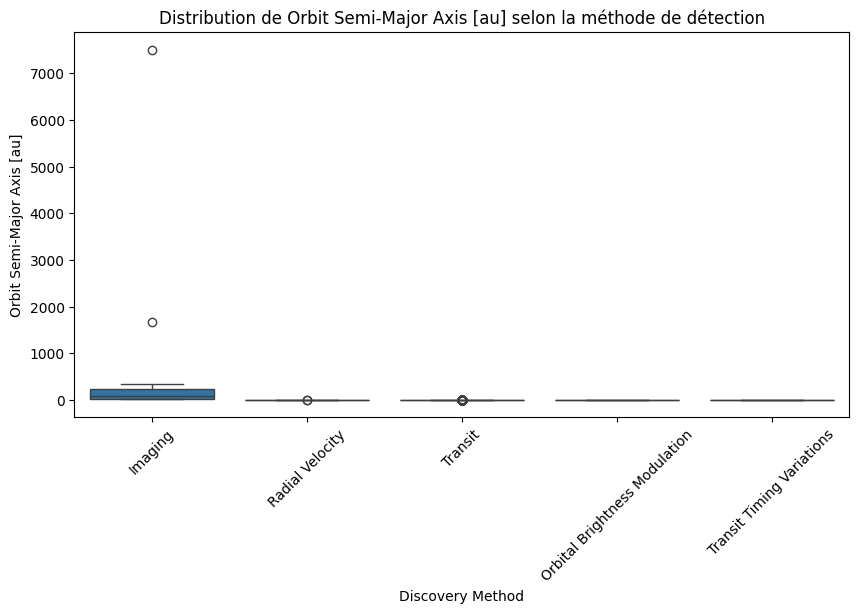

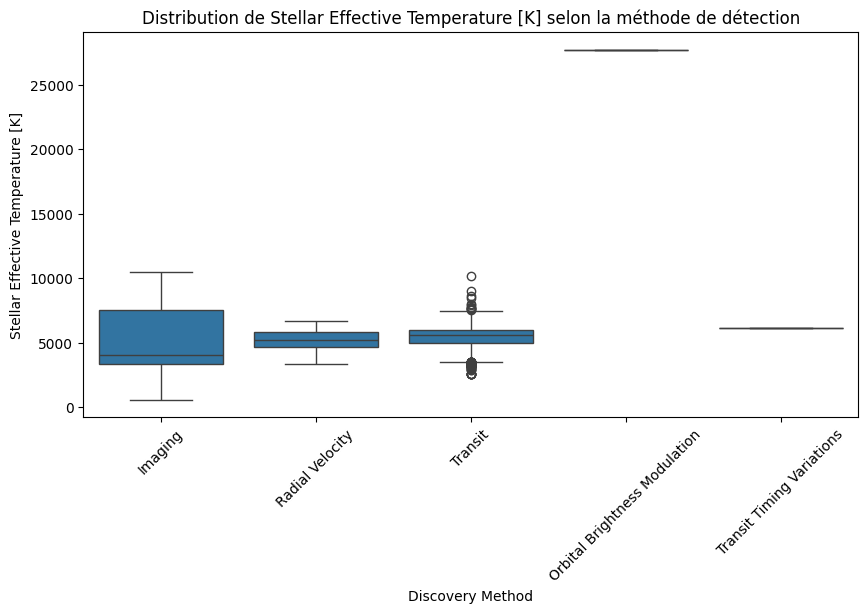

In [ ]:
for feature in features:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=y, y=df[feature])
    plt.title(f'Distribution de {feature} selon la m√©thode de d√©tection')
    plt.xticks(rotation=45)
    plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class i

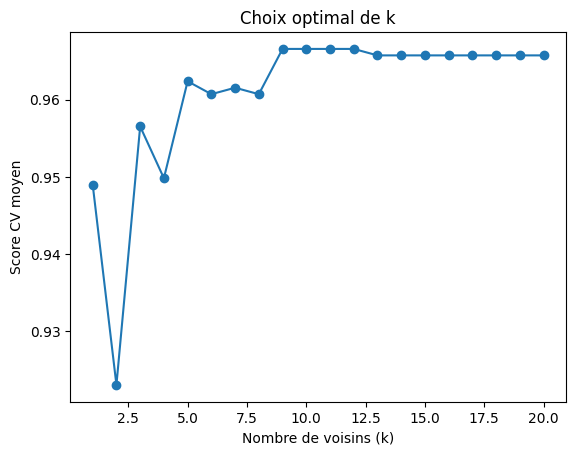

In [ ]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, scaler.fit_transform(X), y_encoded, cv=5).mean()
    scores.append(score)

plt.plot(k_range, scores, marker='o')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score CV moyen')
plt.title('Choix optimal de k')
plt.show()


Analyse des plan√®tes potentiellement habitables
D√©finir une zone habitable simple : temp√©rature entre 200 K et 350 K, rayon entre 0.5 et 2 R_terre, flux d‚Äô√©nergie re√ßu entre 0.8 et 1.2 fois celui de la Terre, etc.
Cr√©er une colonne binaire habitable (oui / non), puis entra√Æner un mod√®le de pr√©diction.


In [ ]:
renommage = {
    'Planet Name': 'pl_name',
    'Host Name': 'hostname',
    'Discovery Year': 'disc_year',
    'Discovery Method': 'discoverymethod',
    'Orbital Period [days]': 'pl_orbper',
    'Orbit Semi-Major Axis [au]': 'pl_orbsmax',
    'Planet Radius [Earth Radius]': 'pl_rade',
    'Planet Radius [Jupiter Radius]': 'pl_radj',
    'Planet Mass or Mass*sin(i) [Earth Mass]': 'pl_bmasse',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]': 'pl_bmassj',
    'Eccentricity': 'pl_orbeccen',
    'Insolation Flux [Earth Flux]': 'pl_insol',
    'Equilibrium Temperature [K]': 'pl_eqt',
    'Stellar Effective Temperature [K]': 'st_teff',
    'Stellar Surface Gravity [log10(cm/s**2)]': 'st_logg'
}

df = df.rename(columns=renommage)

# On travaille avec les noms de colonnes complets
df['habitable'] = (
    (df['pl_rade'] >= 0.5) & (df['pl_rade'] <= 2) &
    (df['st_teff'] >= 4000) & (df['st_teff'] <= 6500) &  # temp√©rature √©toile approxim√©e "habitable"
    (df['pl_orbsmax'] >= 0.5) & (df['pl_orbsmax'] <= 2)  # zone habitable approximative en AU
).astype(int)


print(df['habitable'].value_counts())



habitable
0    1197
Name: count, dtype: int64


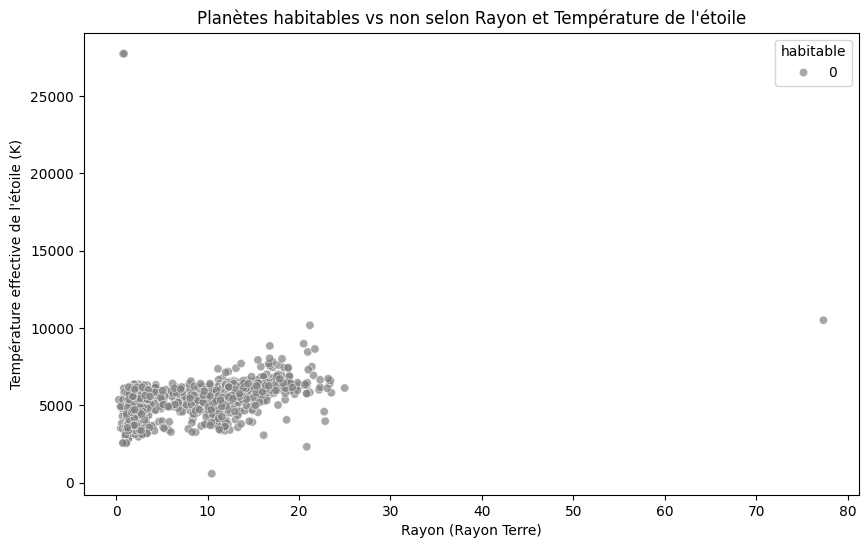

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='pl_rade',
    y='st_teff',
    hue='habitable',
    palette={0:'gray', 1:'green'},
    alpha=0.7
)
plt.title('Plan√®tes habitables vs non selon Rayon et Temp√©rature de l\'√©toile')
plt.xlabel('Rayon (Rayon Terre)')
plt.ylabel('Temp√©rature effective de l\'√©toile (K)')
plt.show()




Utilisation du mod√®le KMeans

Colonnes disponibles dans df :
Index(['pl_name', 'pl_bmasse', 'pl_rade', 'pl_orbsmax', 'st_teff',
       'discoverymethod', 'habitable'],
      dtype='object')
Nombre de lignes uniques apr√®s nettoyage : 1197


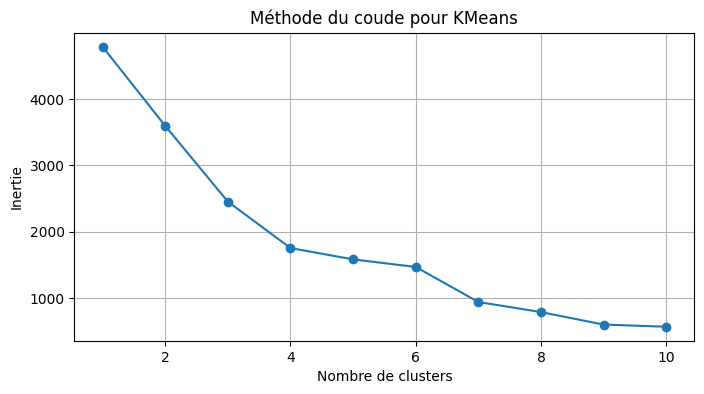

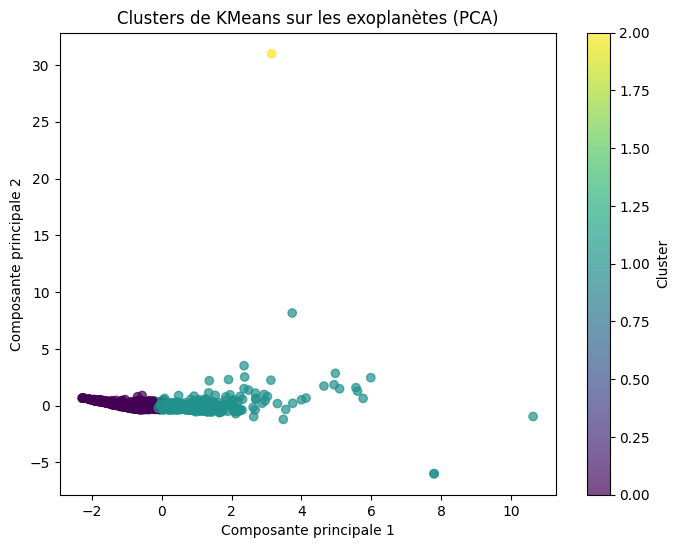

Silhouette score : 0.44

Caract√©ristiques moyennes par cluster :
           pl_bmasse    pl_rade   pl_orbsmax      st_teff
cluster                                                  
0          49.227836   3.703305     0.109434  4892.193345
1         695.415287  14.054720     4.230031  5951.844288
2        2002.318964  12.441969  7506.000000  3406.000000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- √âtape 1 : V√©rifier les colonnes pr√©sentes ---
print("Colonnes disponibles dans df :")
print(df.columns)

# Dictionnaire de renommage (adapter si besoin selon print ci-dessus)
renommage = {
    'Planet Name': 'pl_name',
    'Host Name': 'hostname',
    'Discovery Year': 'disc_year',
    'Discovery Method': 'discoverymethod',
    'Orbital Period [days]': 'pl_orbper',
    'Orbit Semi-Major Axis [au]': 'pl_orbsmax',
    'Planet Radius [Earth Radius]': 'pl_rade',
    'Planet Radius [Jupiter Radius]': 'pl_radj',
    'Planet Mass or Mass*sin(i) [Earth Mass]': 'pl_bmasse',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]': 'pl_bmassj',
    'Eccentricity': 'pl_orbeccen',
    'Insolation Flux [Earth Flux]': 'pl_insol',
    'Equilibrium Temperature [K]': 'pl_eqt',
    'Stellar Effective Temperature [K]': 'st_teff',
    'Stellar Surface Gravity [log10(cm/s**2)]': 'st_logg'
}

df = df.rename(columns=renommage)

# V√©rification des colonnes renomm√©es pr√©sentes
# Colonnes √† utiliser pour le clustering
colonnes_utiles = ['pl_bmasse', 'pl_rade', 'pl_orbsmax', 'st_teff']
colonnes_presentes = [col for col in colonnes_utiles if col in df.columns]

if len(colonnes_presentes) < 2:
    raise ValueError("Trop peu de colonnes valides pour appliquer KMeans. V√©rifiez les noms.")

df = df[colonnes_presentes]

# --- Nettoyage ---
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)

print(f"Nombre de lignes uniques apr√®s nettoyage : {df.shape[0]}")

# --- Standardisation ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# --- M√©thode du coude ---
inertias = []
range_n = range(1, 11)
for n in range_n:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range_n, inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie")
plt.title("M√©thode du coude pour KMeans")
plt.grid(True)
plt.show()

# --- Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# --- PCA pour visualiser ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('Clusters de KMeans sur les exoplan√®tes (PCA)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()

# --- √âvaluation ---
score = silhouette_score(X_scaled, labels)
print(f"Silhouette score : {score:.2f}")

# --- Moyennes par cluster ---
df['cluster'] = labels
print("\nCaract√©ristiques moyennes par cluster :")
print(df.groupby('cluster').mean())
